In [1]:
# preliminaries
import numpy as np
import os
import matplotlib.pyplot as plt
import sys  
sys.path.insert(0, r'C:\Users\payto\hubbleconst')
%matplotlib inline

import sncosmo # we'll use this to get SN distances
import snana # we'll use this to read supernova light curve files
from astropy.io import fits
import astropy.units as u
from astropy.table import Table
import gzip
import warnings
import get_vpec
import LC_CLASS
# let's get ready to measure distances relative to
# a cosmological model with H0=70, cosmic matter = 0.3
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(70,0.3)

In [2]:
from os import listdir
from os.path import isfile, join
path = 'SNDATA_ROOT/research_2nd_sample/'
fileslist = [f for f in listdir(path) if isfile(join(path, f))]

In [3]:
#475 total files

In [4]:
sns = []
for path in fileslist:
    file = os.path.expandvars('SNDATA_ROOT/research_2nd_sample/'+ path)
    print(file)
    sn_ = snana.SuperNova(file)
    sns.append(sn_)

SNDATA_ROOT/research_2nd_sample/1241.dat.gz
SNDATA_ROOT/research_2nd_sample/12898.dat.gz
SNDATA_ROOT/research_2nd_sample/12950.dat.gz
SNDATA_ROOT/research_2nd_sample/16185.dat.gz
SNDATA_ROOT/research_2nd_sample/17186.dat.gz
SNDATA_ROOT/research_2nd_sample/17220.dat.gz
SNDATA_ROOT/research_2nd_sample/17745.dat.gz
SNDATA_ROOT/research_2nd_sample/17784.dat.gz
SNDATA_ROOT/research_2nd_sample/18241.dat.gz
SNDATA_ROOT/research_2nd_sample/1993ac.dat
SNDATA_ROOT/research_2nd_sample/1993ae.dat
SNDATA_ROOT/research_2nd_sample/1994ae.dat.gz
SNDATA_ROOT/research_2nd_sample/1994M.dat
SNDATA_ROOT/research_2nd_sample/1994Q.dat
SNDATA_ROOT/research_2nd_sample/1994S.dat
SNDATA_ROOT/research_2nd_sample/1994T.dat
SNDATA_ROOT/research_2nd_sample/1995ac.dat.gz
SNDATA_ROOT/research_2nd_sample/1995ak.dat
SNDATA_ROOT/research_2nd_sample/1995al.dat.gz
SNDATA_ROOT/research_2nd_sample/1995D.dat
SNDATA_ROOT/research_2nd_sample/19968.dat.gz
SNDATA_ROOT/research_2nd_sample/1996bl.dat.gz
SNDATA_ROOT/research_2nd_sam

SNDATA_ROOT/research_2nd_sample/CFA4_p1_2008cf.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p1_2008fr.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p1_2008gb.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p1_2008gl.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p1_2008Y.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p1_2009ad.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p1_2009an.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p1_2009D.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p1_2009ds.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p2_2009kk.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p2_2009kq.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p2_2009le.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p2_2009na.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p2_2009nq.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p2_2010dt.dat.gz
SNDATA_ROOT/research_2nd_sample/CFA4_p2_2010Y.dat.gz
SNDATA_ROOT/research_2nd_sample/CSPDR2_2005M.dat.gz
SNDATA_ROOT/research_2nd_sample/CSPDR2_2006bh.dat.gz
SNDATA_ROOT/research_2nd_sample/CS

SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_ASASSN-16la.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_ASASSN-16lg.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_ASASSN-16oz.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_ASASSN-17at.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_ASASSN-17bs.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_ASASSN-17co.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_ASASSN-17eb.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_AT2016ajl.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_AT2016bln.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_AT2016cor.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_AT2016cvv.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_AT2016cvw.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_AT2016cyt.txt.gz
SNDATA_ROOT/research_2nd_sample/Foundation_DR1_spec_AT2016eoa.txt.gz
SNDATA_ROOT/research

1241
SDSS ['wavelength (A)', 'SDSS-u', 'SDSS-g', 'SDSS-r', 'SDSS-i', 'SDSS-z', 'CSP-u/t', 'CSP-B/v', 'CSP-o/y', 'CSP-m/w', 'CSP-n/x', 'CSP-g/A', 'CSP-r/B', 'CSP-i/C', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l']
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


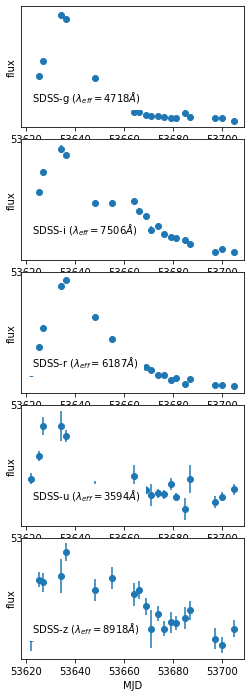

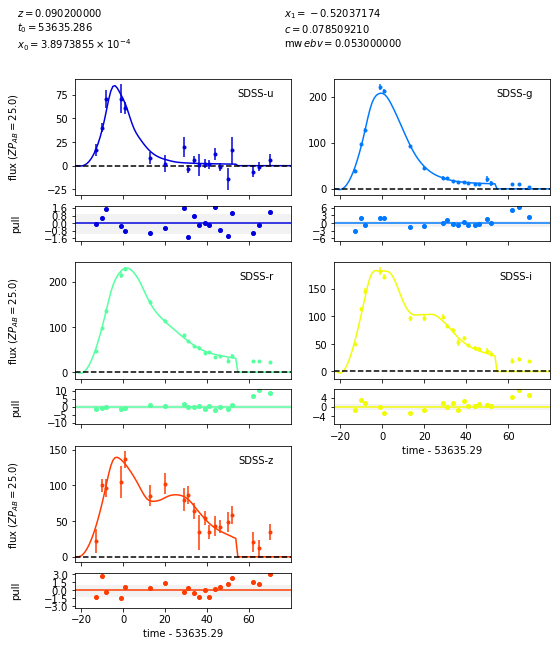

12898
SDSS ['wavelength (A)', 'SDSS-u', 'SDSS-g', 'SDSS-r', 'SDSS-i', 'SDSS-z', 'CSP-u/t', 'CSP-B/v', 'CSP-o/y', 'CSP-m/w', 'CSP-n/x', 'CSP-g/A', 'CSP-r/B', 'CSP-i/C', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l']
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


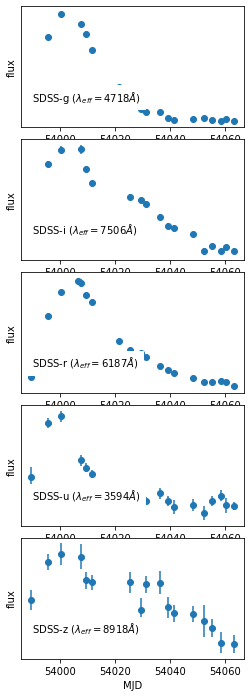

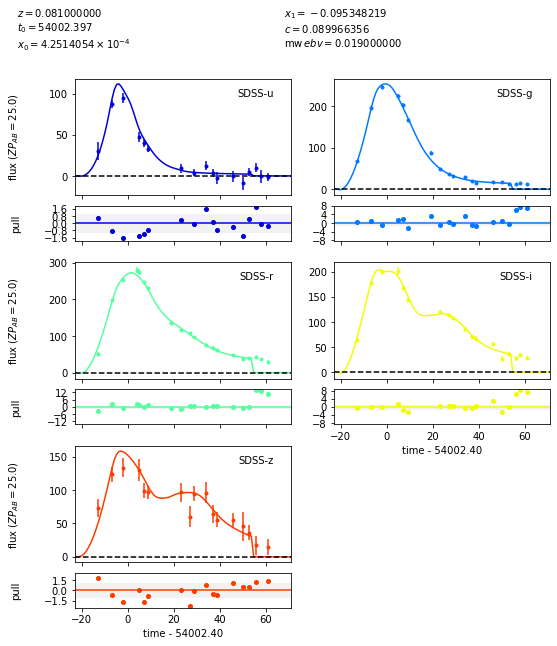

12950
SDSS ['wavelength (A)', 'SDSS-u', 'SDSS-g', 'SDSS-r', 'SDSS-i', 'SDSS-z', 'CSP-u/t', 'CSP-B/v', 'CSP-o/y', 'CSP-m/w', 'CSP-n/x', 'CSP-g/A', 'CSP-r/B', 'CSP-i/C', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l']
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


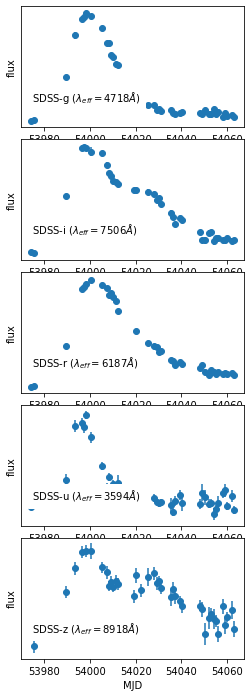

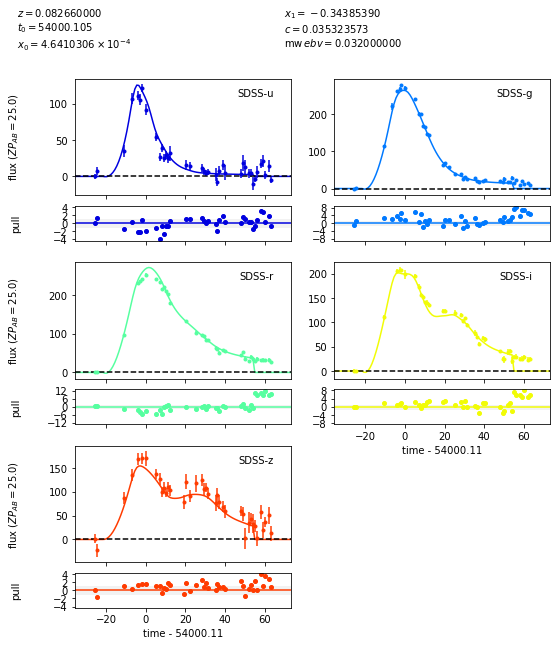

16185
SDSS ['wavelength (A)', 'SDSS-u', 'SDSS-g', 'SDSS-r', 'SDSS-i', 'SDSS-z', 'CSP-u/t', 'CSP-B/v', 'CSP-o/y', 'CSP-m/w', 'CSP-n/x', 'CSP-g/A', 'CSP-r/B', 'CSP-i/C', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l']
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


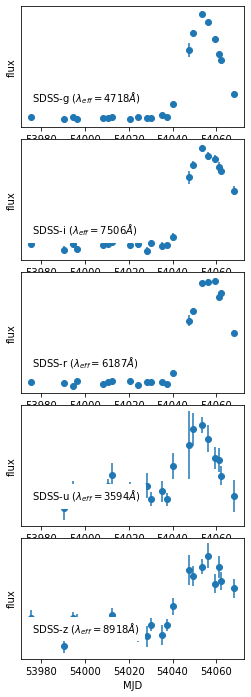

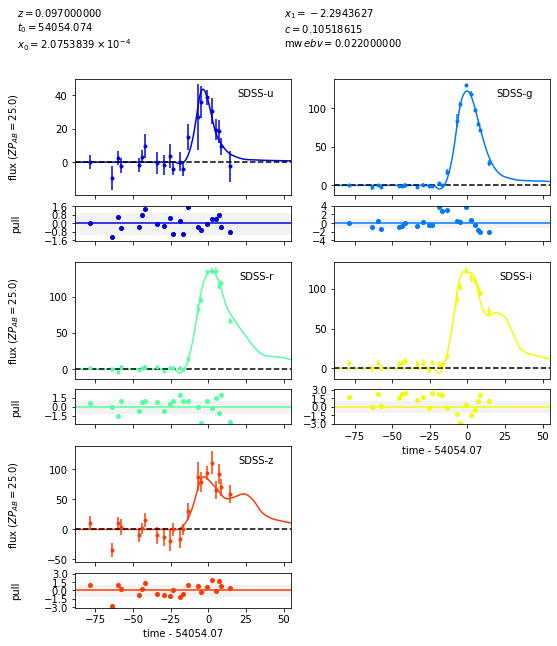

17186
SDSS ['wavelength (A)', 'SDSS-u', 'SDSS-g', 'SDSS-r', 'SDSS-i', 'SDSS-z', 'CSP-u/t', 'CSP-B/v', 'CSP-o/y', 'CSP-m/w', 'CSP-n/x', 'CSP-g/A', 'CSP-r/B', 'CSP-i/C', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l']
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


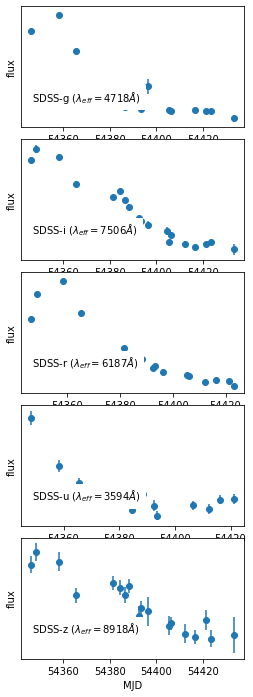

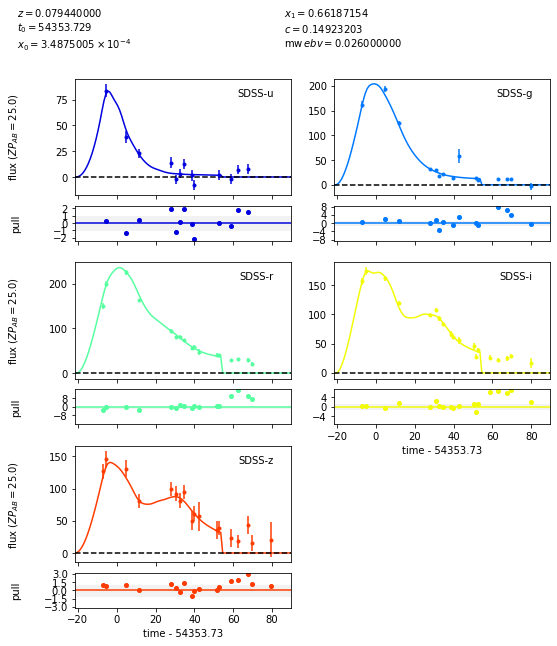

17220
SDSS ['wavelength (A)', 'SDSS-u', 'SDSS-g', 'SDSS-r', 'SDSS-i', 'SDSS-z', 'CSP-u/t', 'CSP-B/v', 'CSP-o/y', 'CSP-m/w', 'CSP-n/x', 'CSP-g/A', 'CSP-r/B', 'CSP-i/C', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l']
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


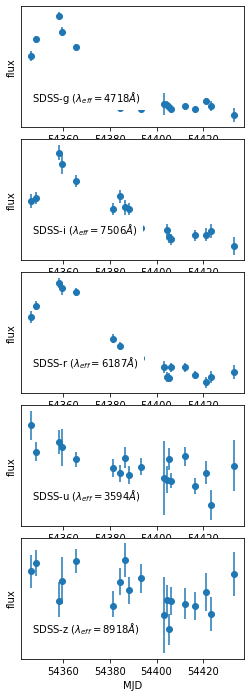

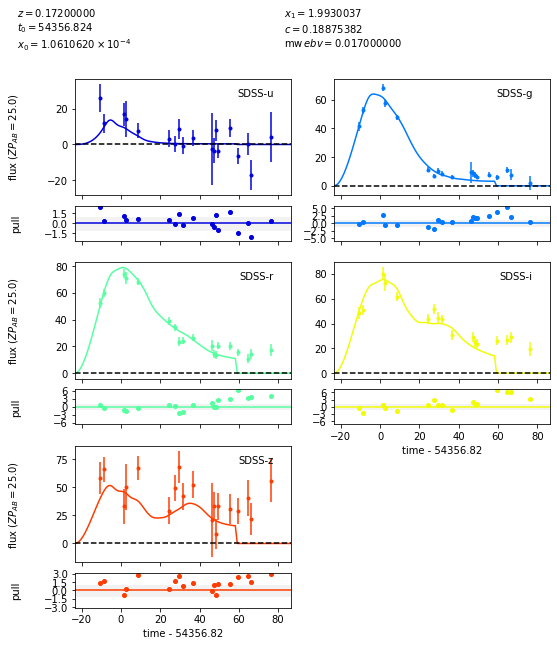

17745
SDSS ['wavelength (A)', 'SDSS-u', 'SDSS-g', 'SDSS-r', 'SDSS-i', 'SDSS-z', 'CSP-u/t', 'CSP-B/v', 'CSP-o/y', 'CSP-m/w', 'CSP-n/x', 'CSP-g/A', 'CSP-r/B', 'CSP-i/C', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l']
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


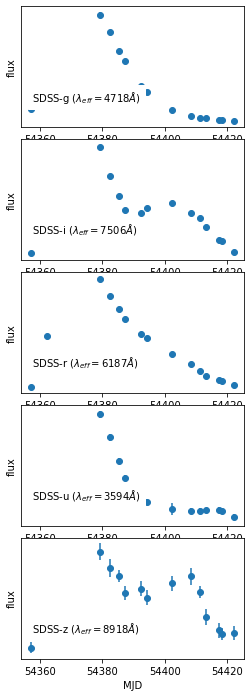

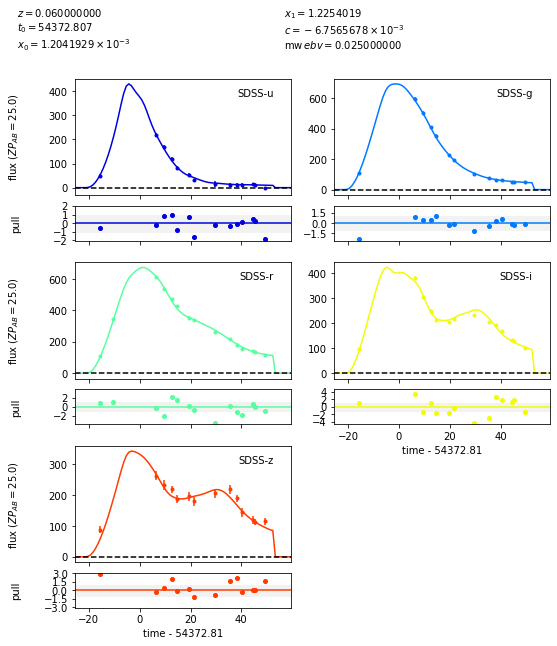

17784
SDSS ['wavelength (A)', 'SDSS-u', 'SDSS-g', 'SDSS-r', 'SDSS-i', 'SDSS-z', 'CSP-u/t', 'CSP-B/v', 'CSP-o/y', 'CSP-m/w', 'CSP-n/x', 'CSP-g/A', 'CSP-r/B', 'CSP-i/C', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l']
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


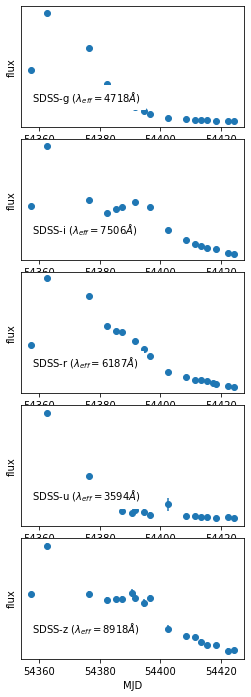

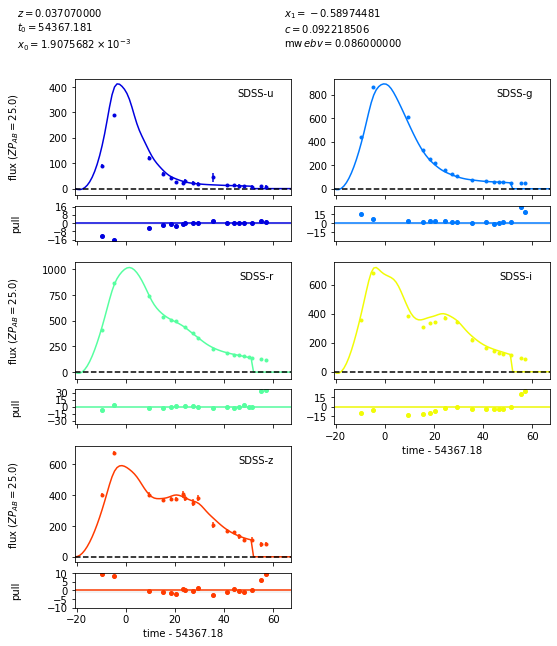

18241
SDSS ['wavelength (A)', 'SDSS-u', 'SDSS-g', 'SDSS-r', 'SDSS-i', 'SDSS-z', 'CSP-u/t', 'CSP-B/v', 'CSP-o/y', 'CSP-m/w', 'CSP-n/x', 'CSP-g/A', 'CSP-r/B', 'CSP-i/C', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l']
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


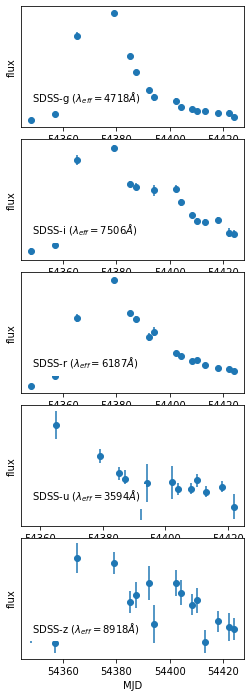

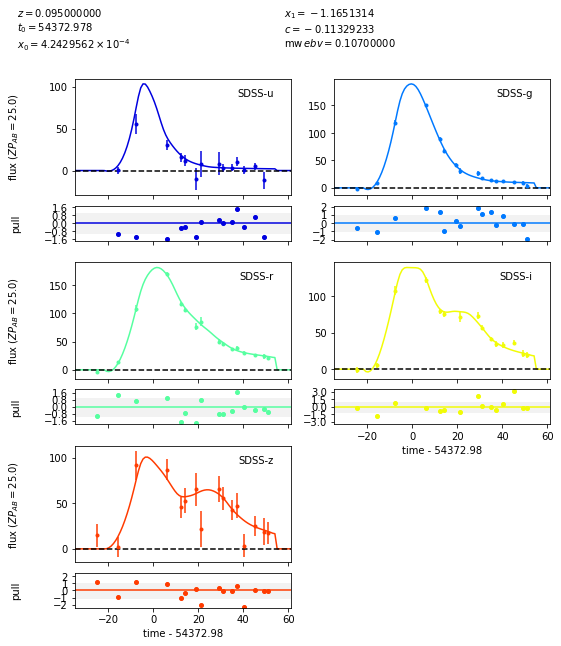

1993ac
CfA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


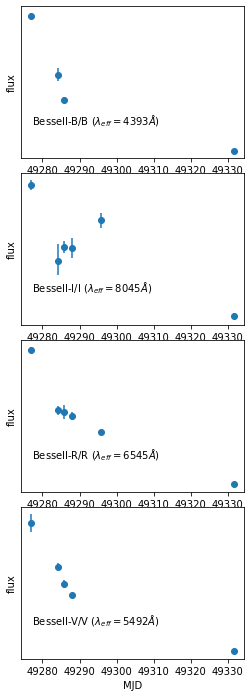

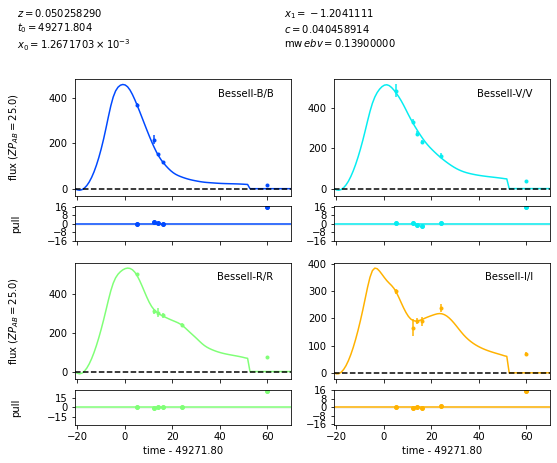

1993ae
CfA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


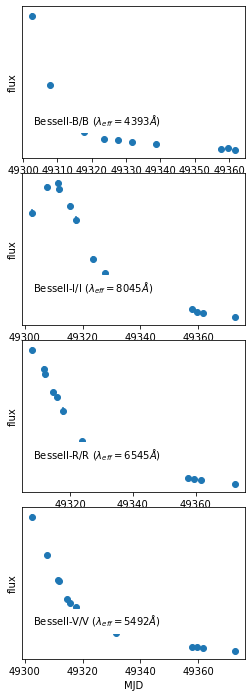

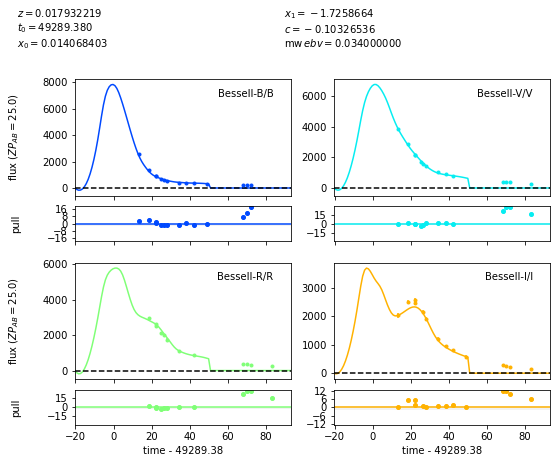

1994ae
CFA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


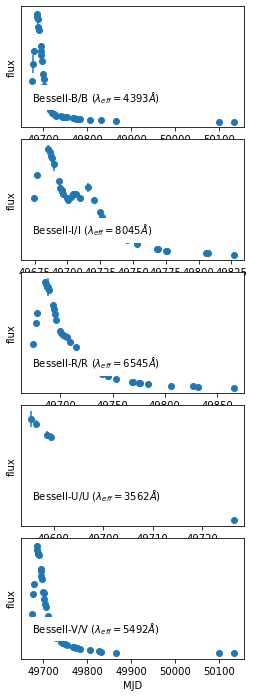

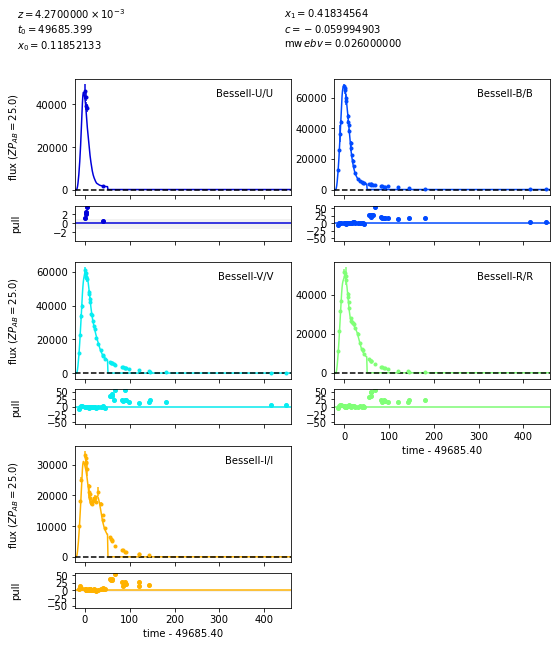

1994M
CfA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


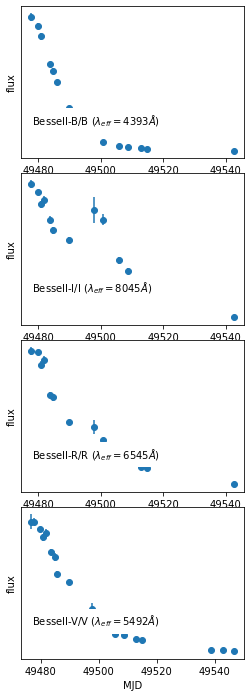

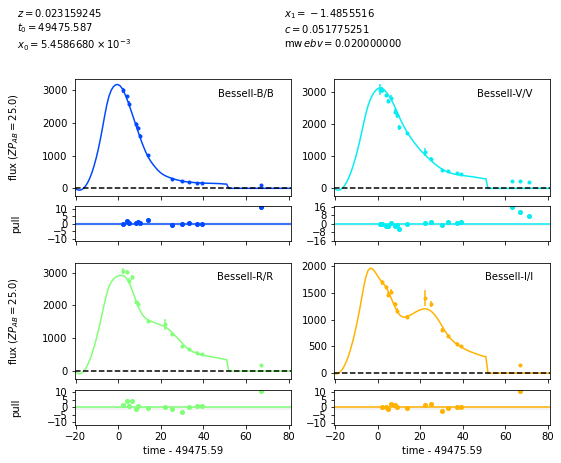

1994Q
CfA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


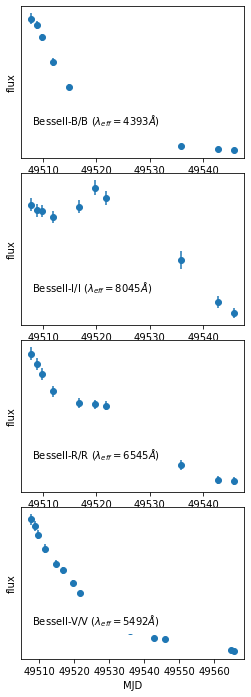

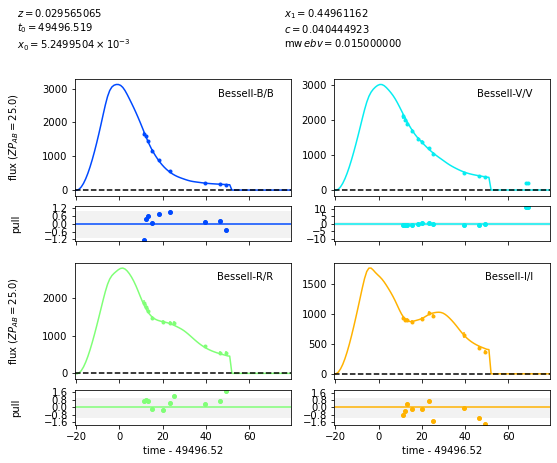

1994S
CfA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


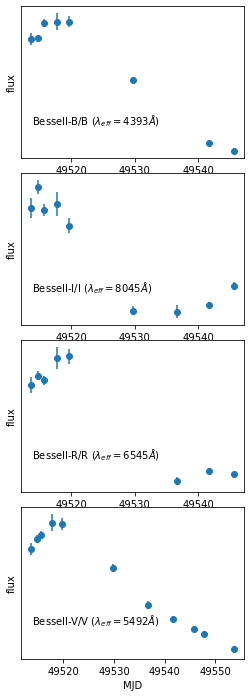

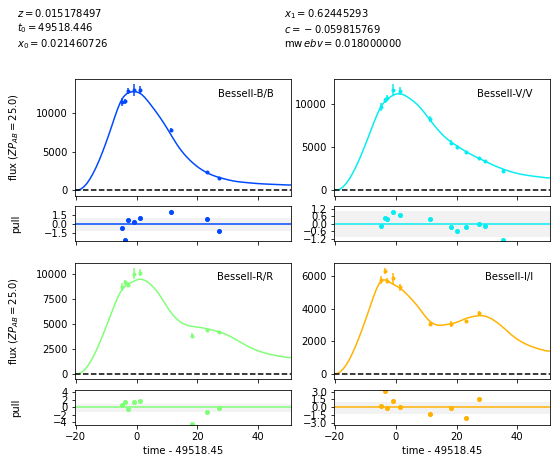

1994T
CfA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


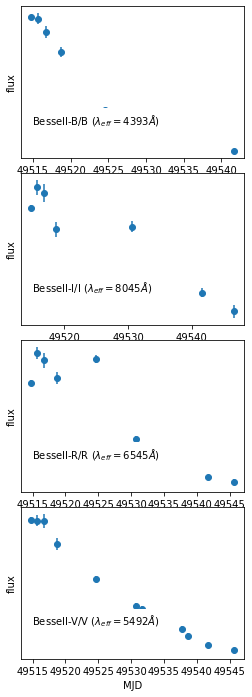

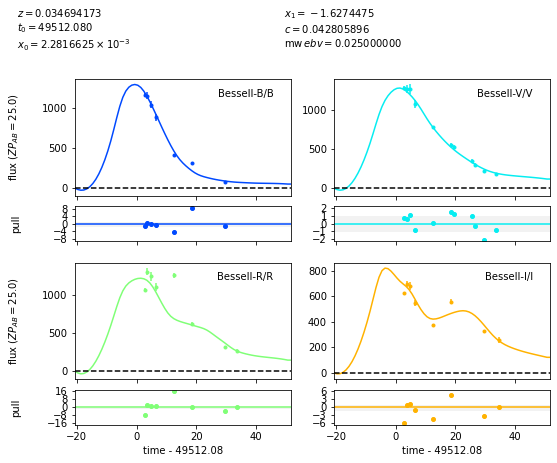

1995ac
CFA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


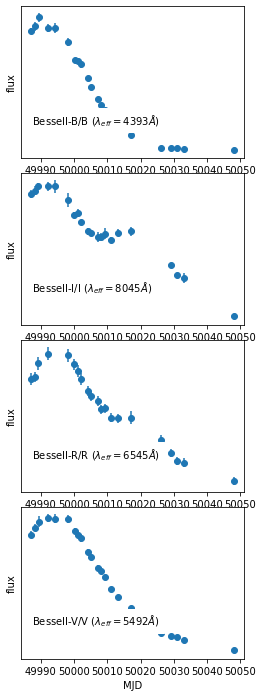

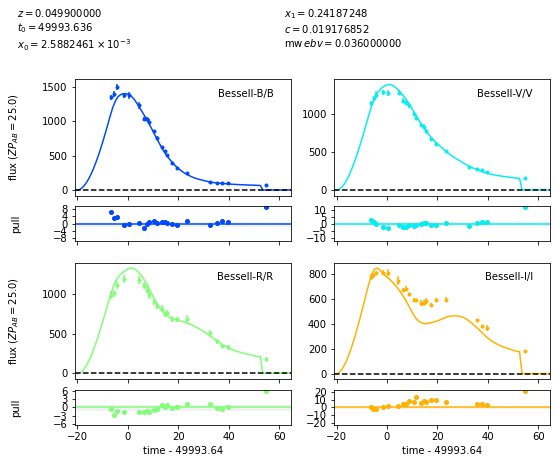

1995ak
CfA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


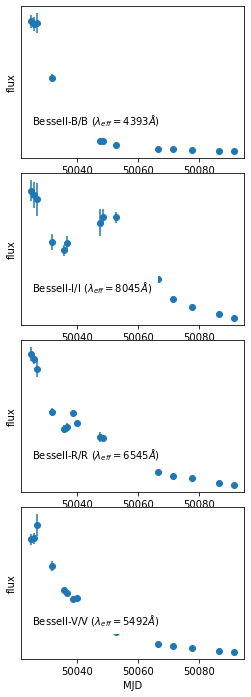

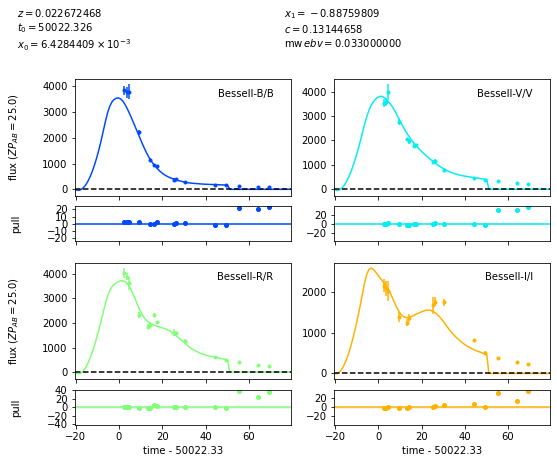

1995al
CFA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


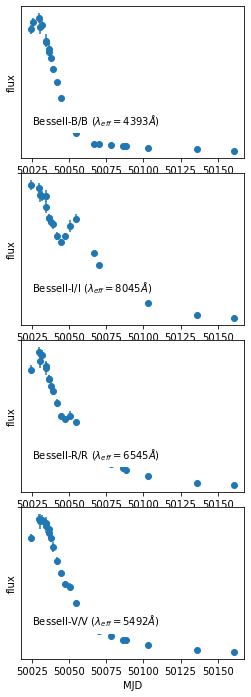

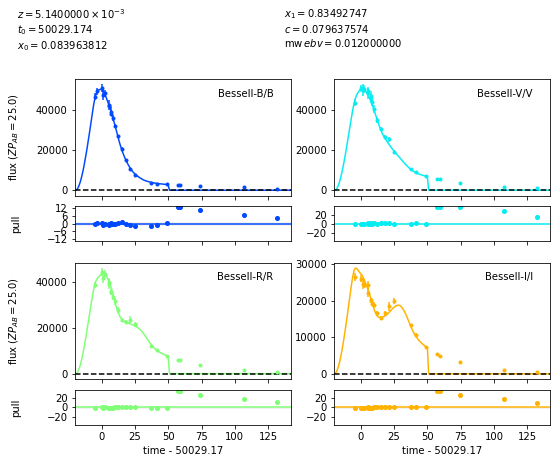

1995D
CfA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


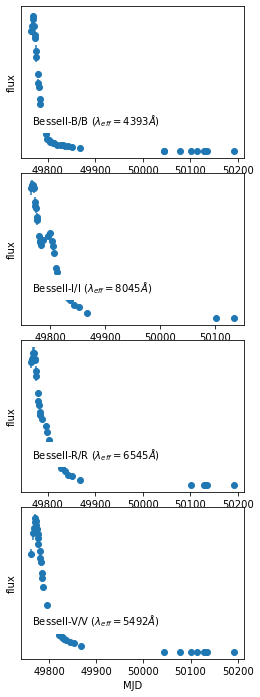

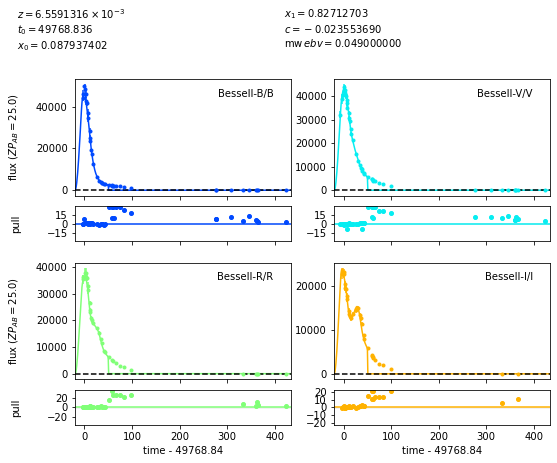

19968
SDSS ['wavelength (A)', 'SDSS-u', 'SDSS-g', 'SDSS-r', 'SDSS-i', 'SDSS-z', 'CSP-u/t', 'CSP-B/v', 'CSP-o/y', 'CSP-m/w', 'CSP-n/x', 'CSP-g/A', 'CSP-r/B', 'CSP-i/C', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l']
SDSS-g
SDSS-i
SDSS-r
SDSS-u
SDSS-z


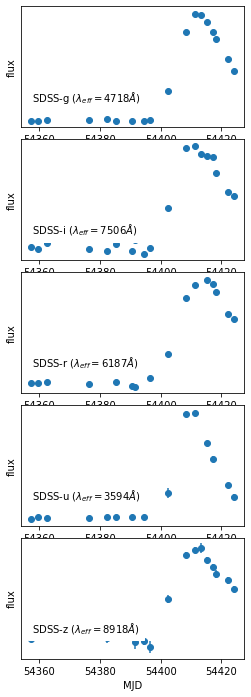

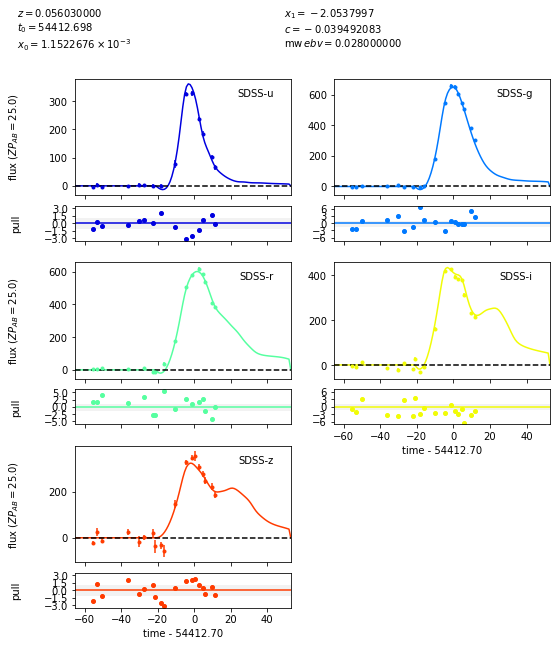

1996bl
LOWZ ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


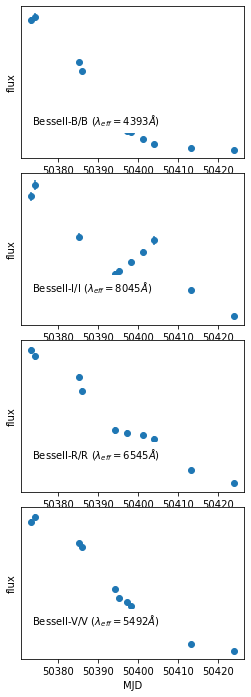

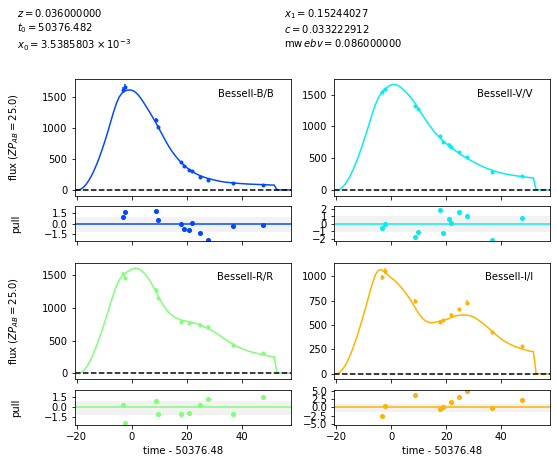

1996bv
CfA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


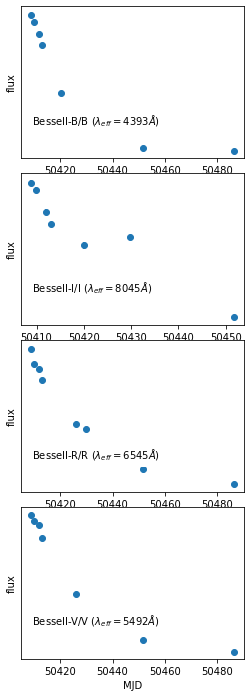

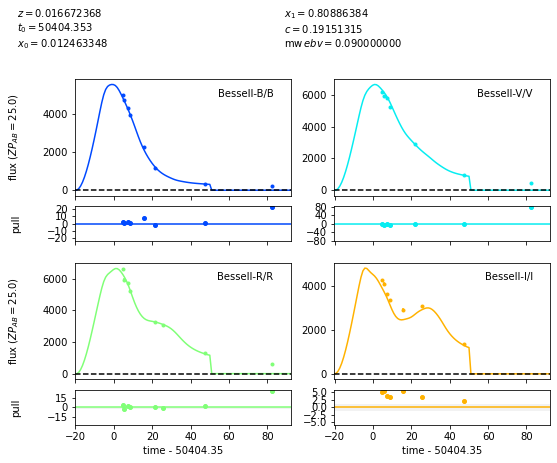

1996C
CfA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-V/V


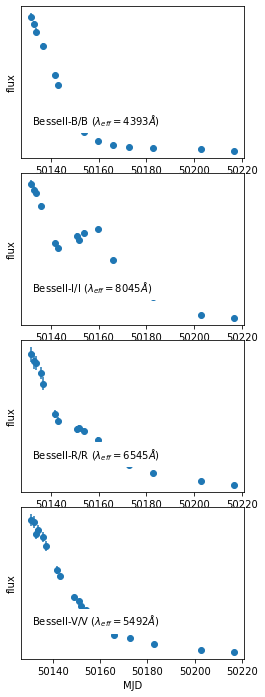

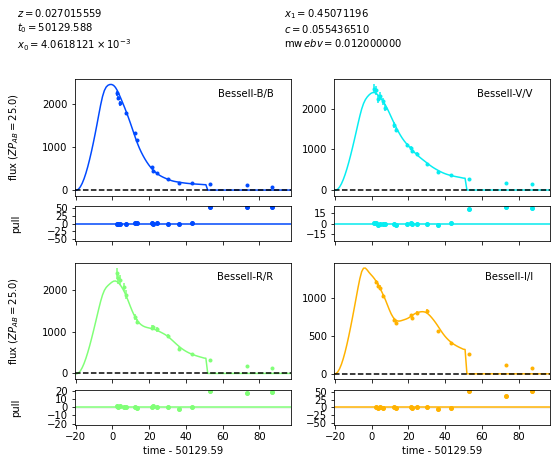

1996X
CfA1 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


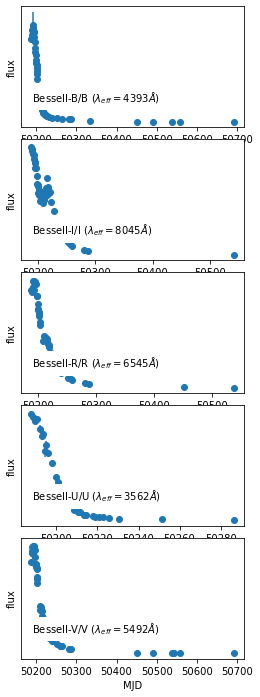

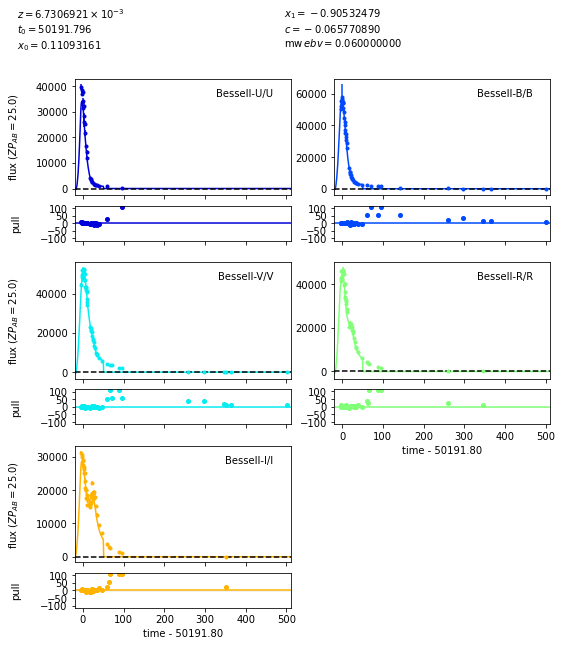

1997bp
CFA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


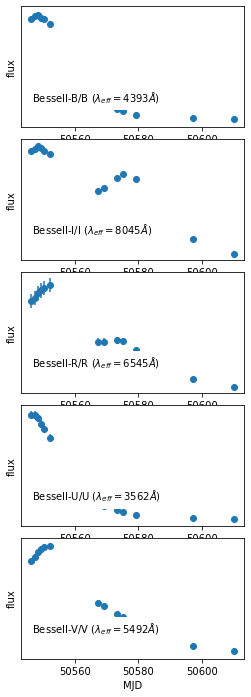

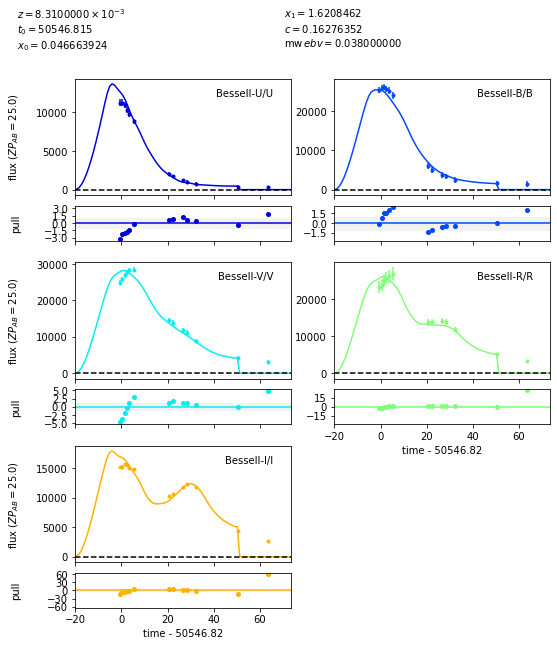

1997bq
LOWZ ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


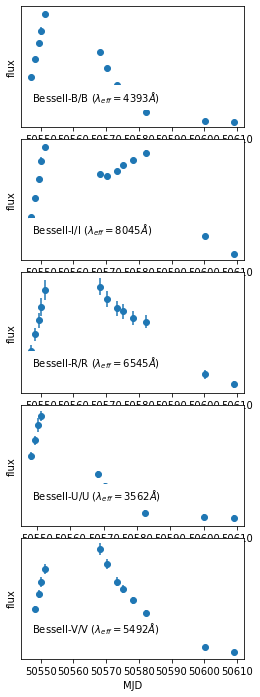

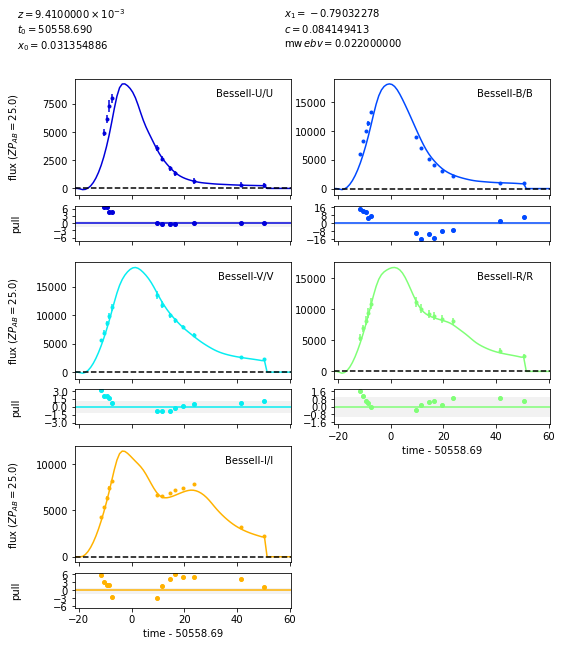

1997br
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


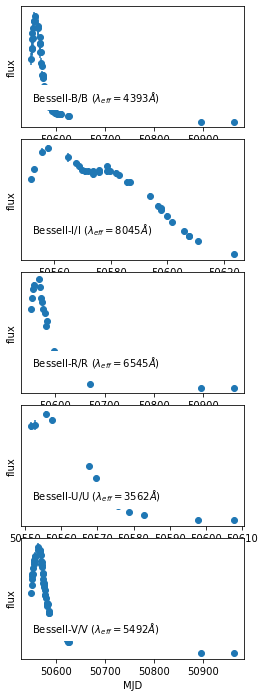

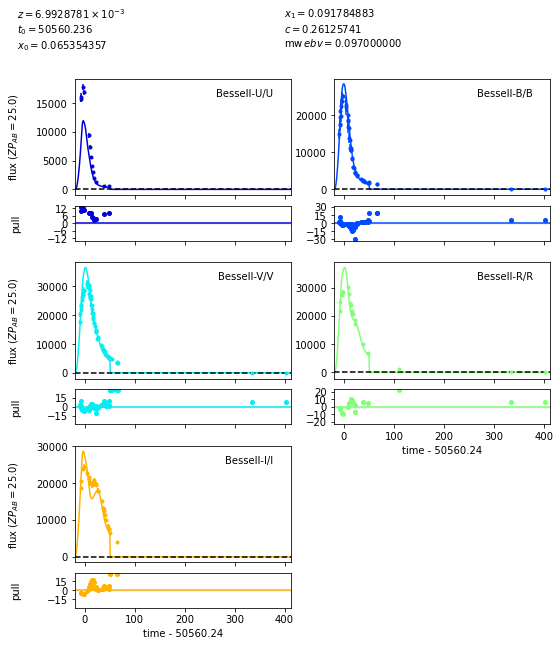

1997dg
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


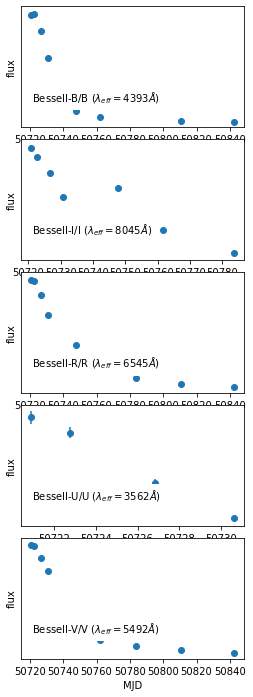

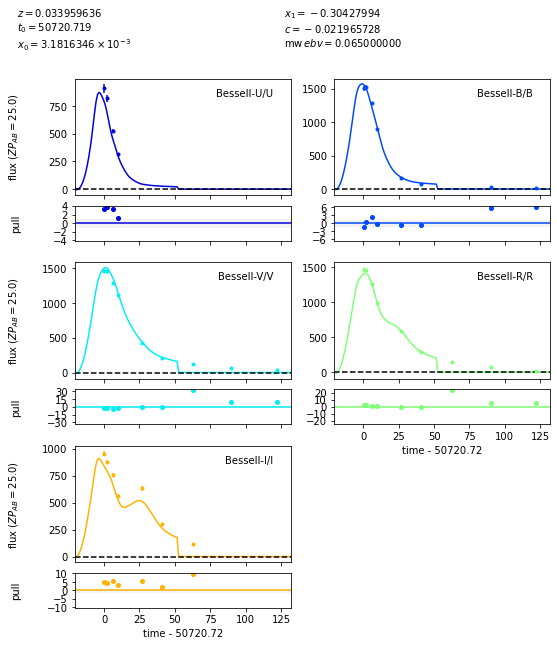

1997do
CFA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


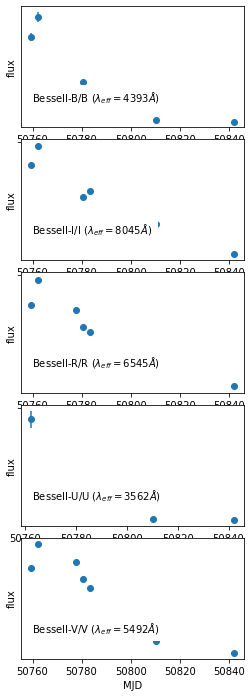

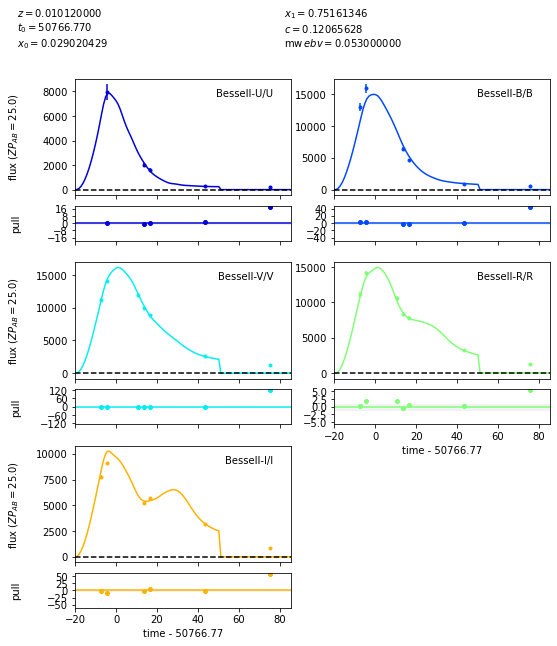

1997E
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


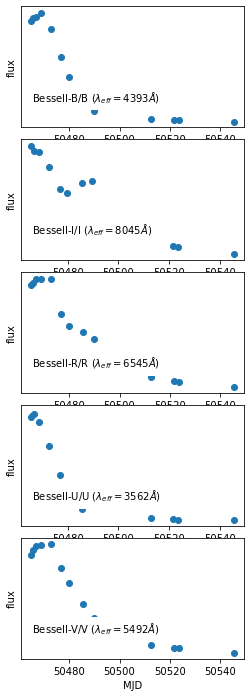

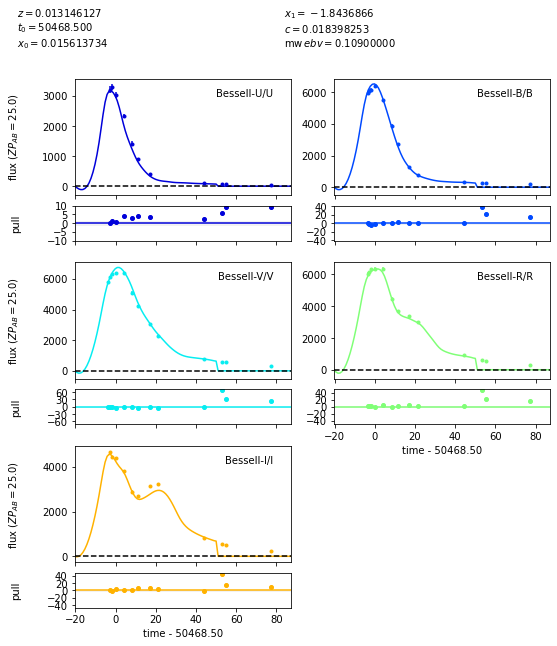

1997Y
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


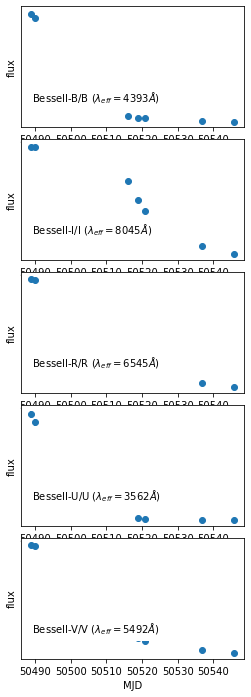

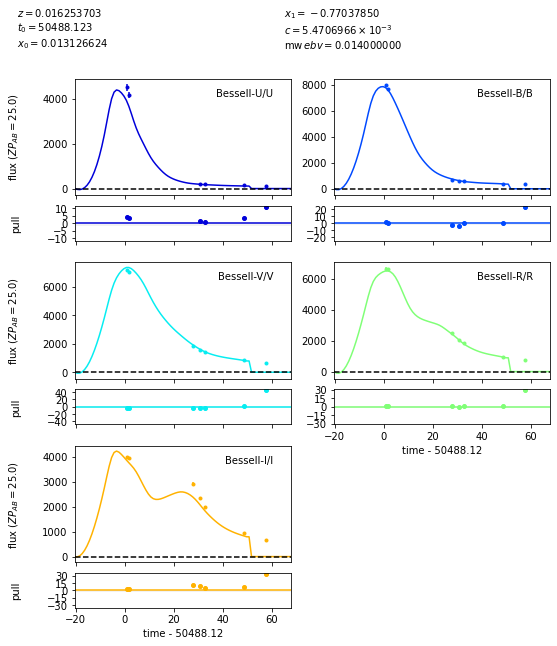

1998ab
CFA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


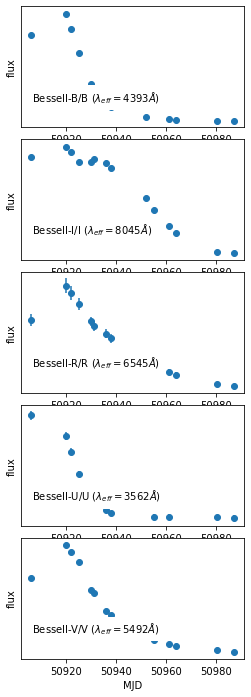

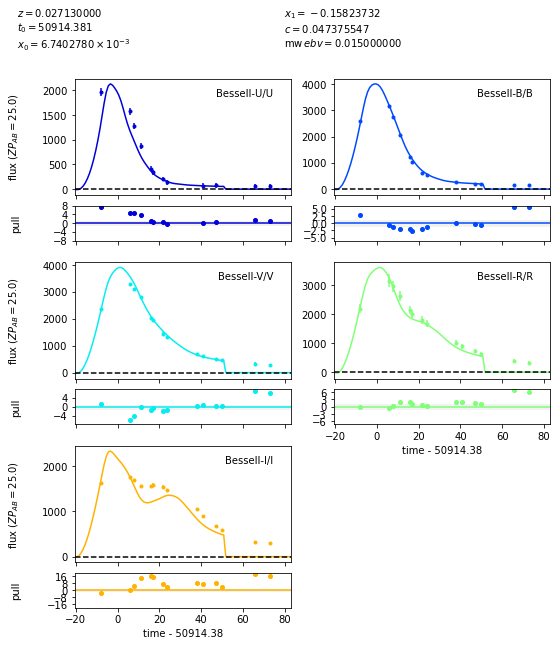

1998bp
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


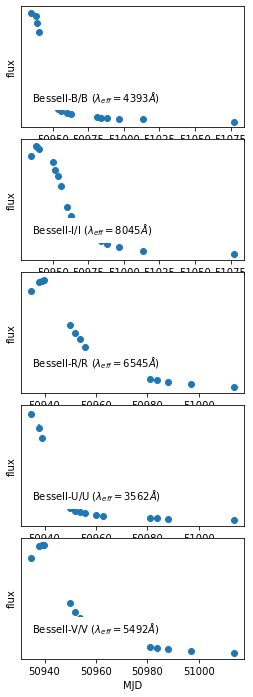

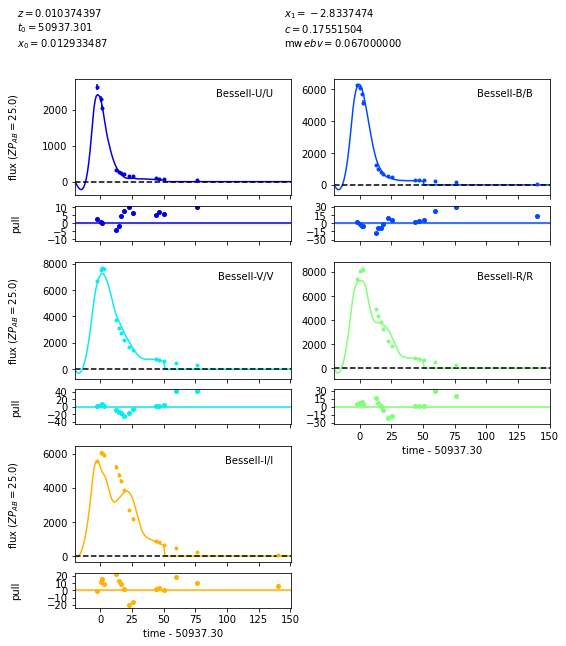

1998dh
LOWZ ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


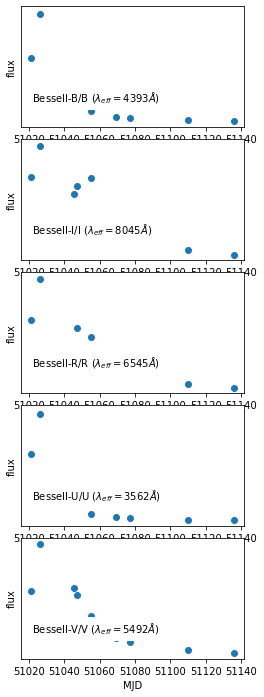

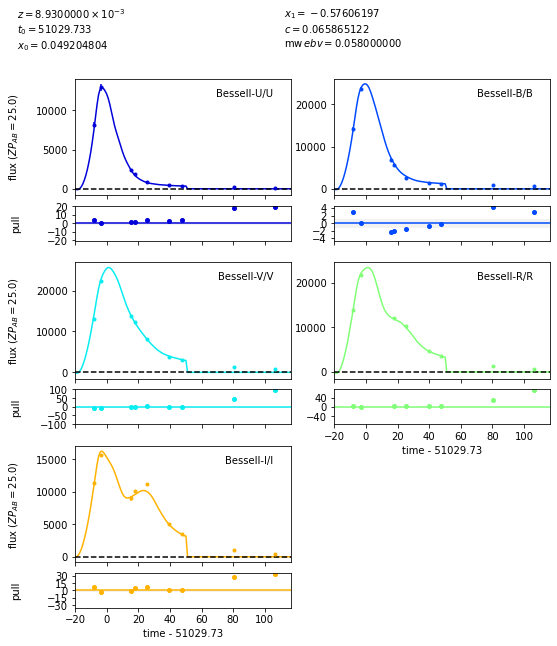

1998dk
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


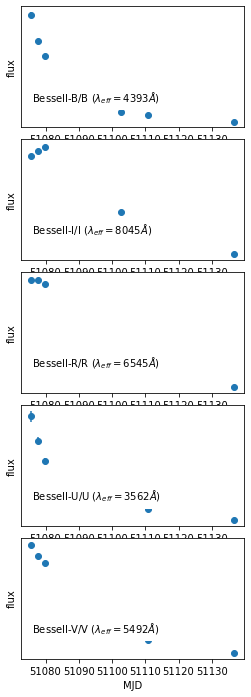

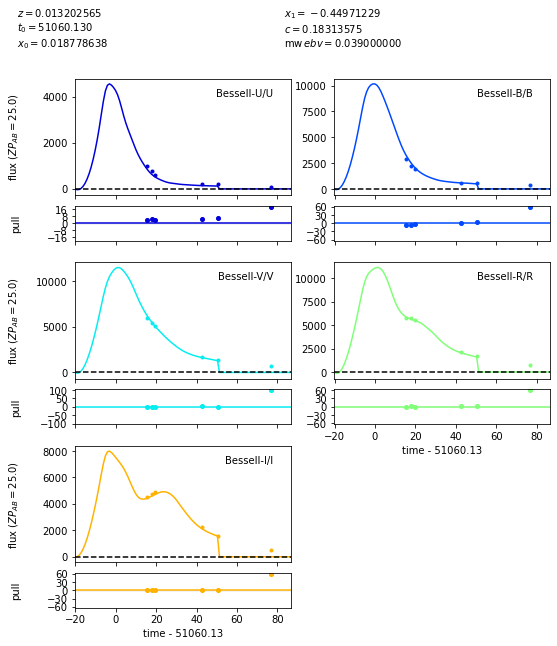

1998dx
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


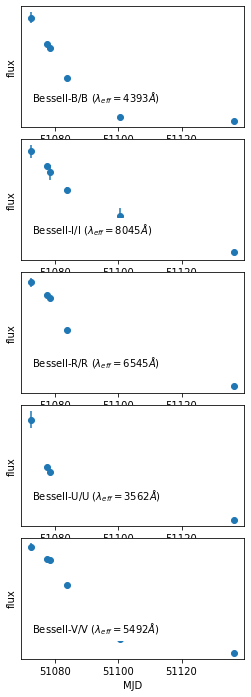

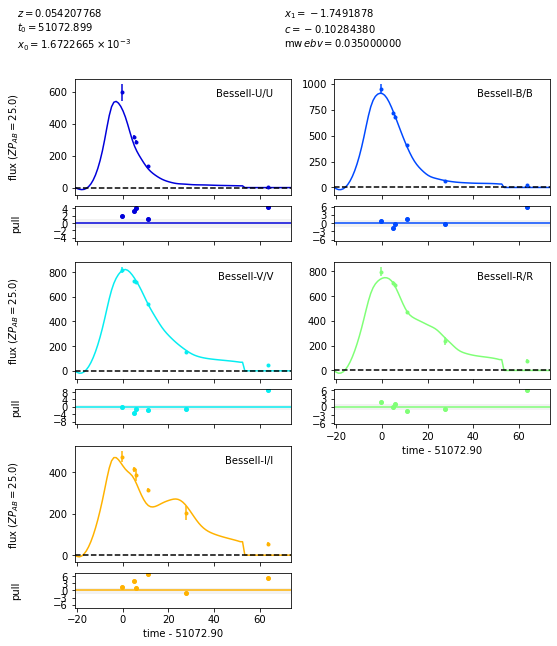

1998ef
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


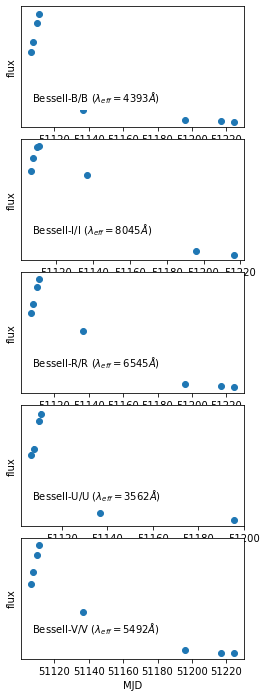

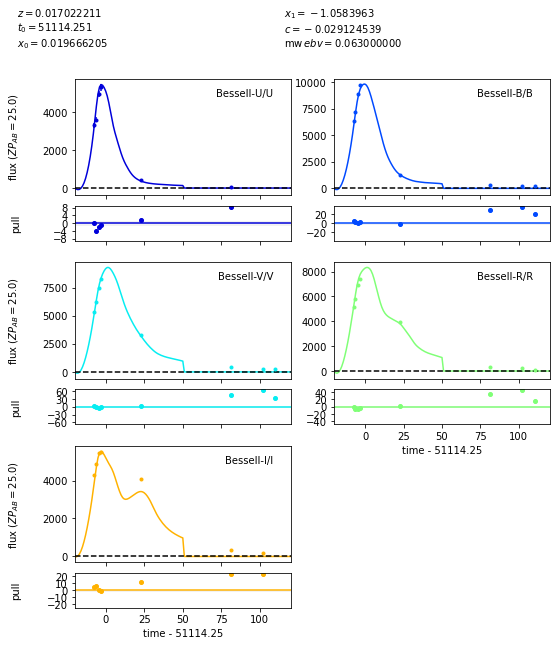

1998eg
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


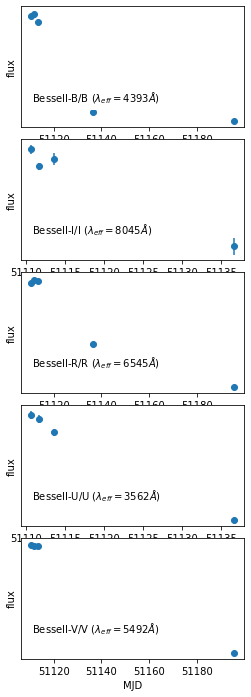

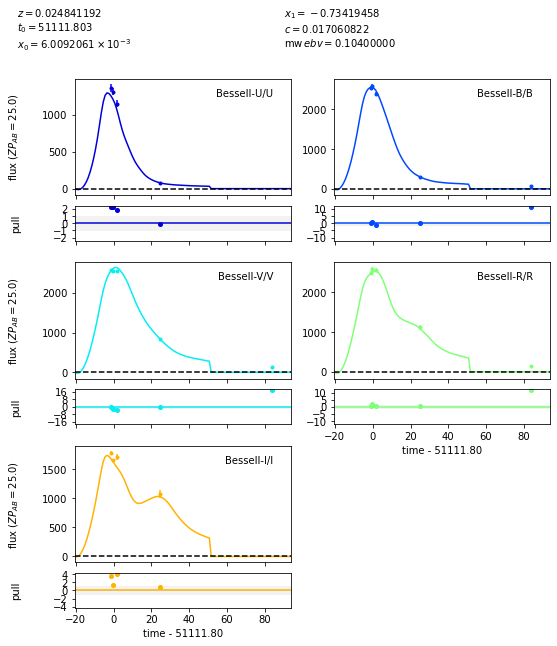

1998es
CFA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


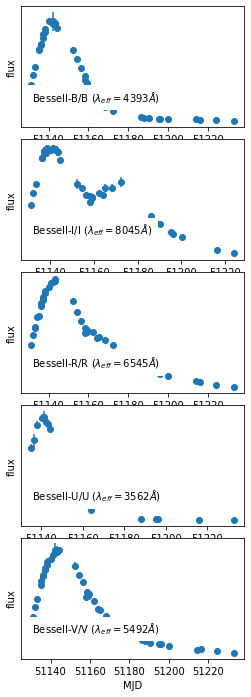

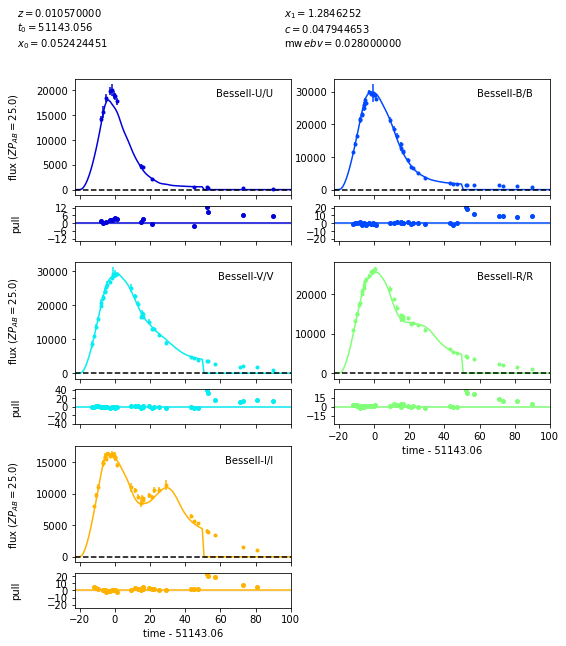

1998V
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


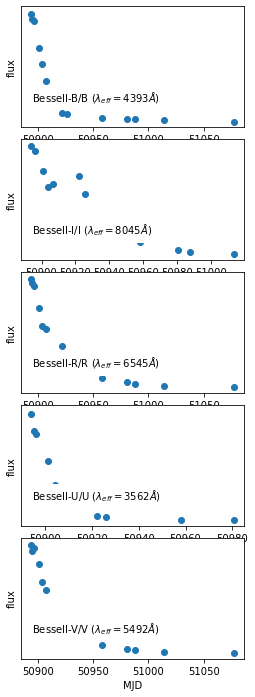

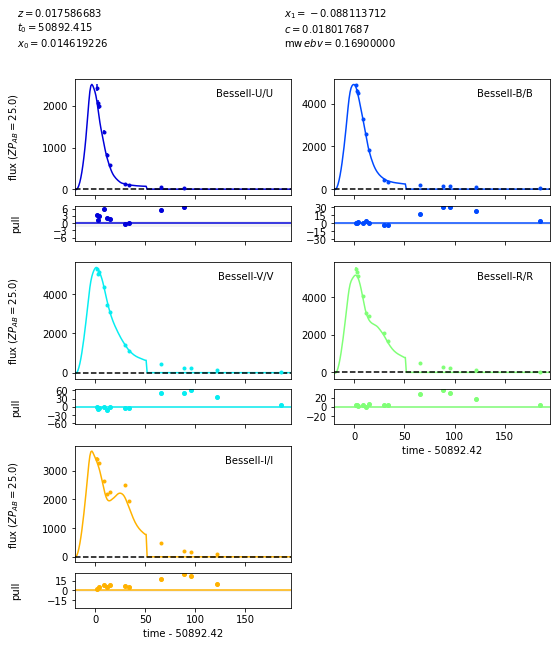

1999aa
CFA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


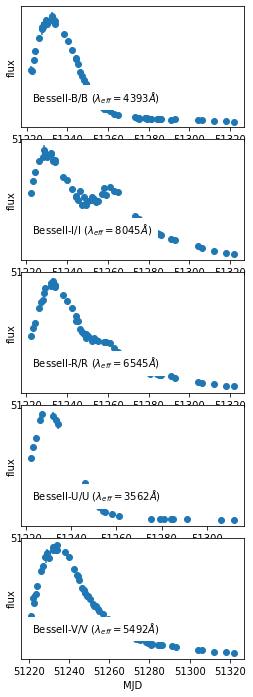

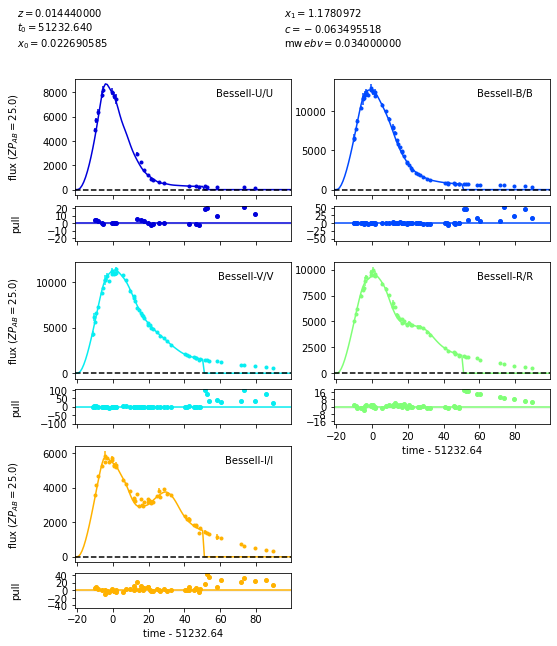

1999ac
CFA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


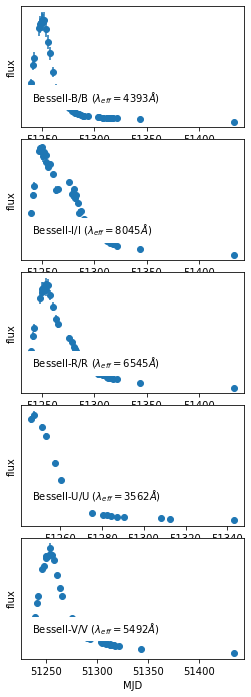

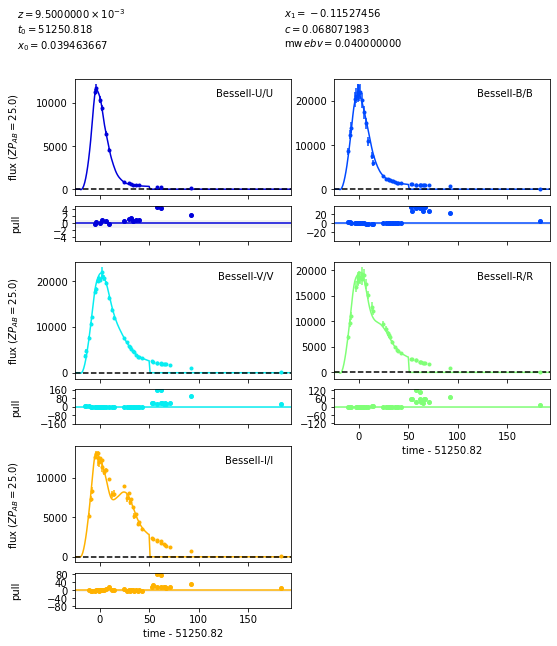

1999cc
CFA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


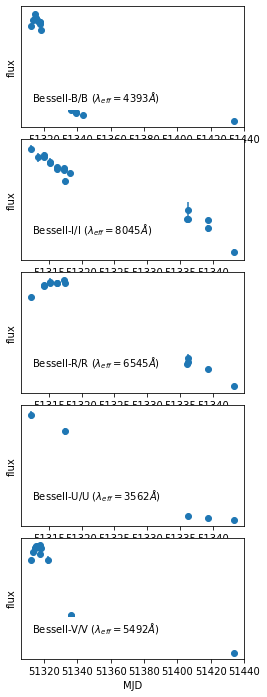

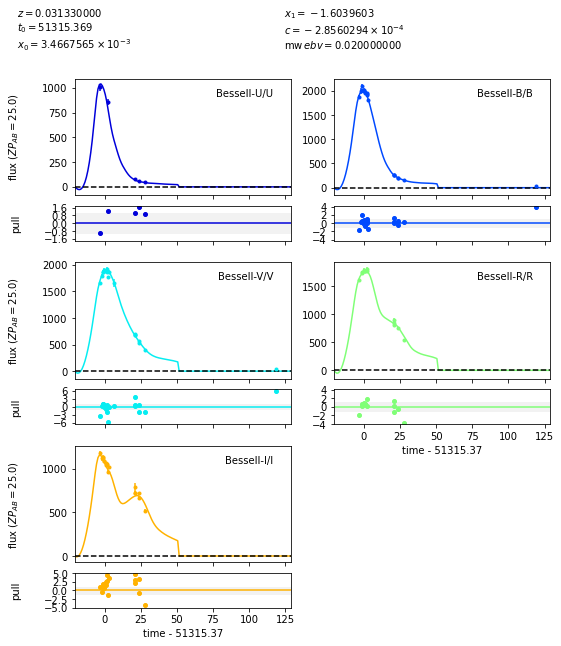

1999dq
CFA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


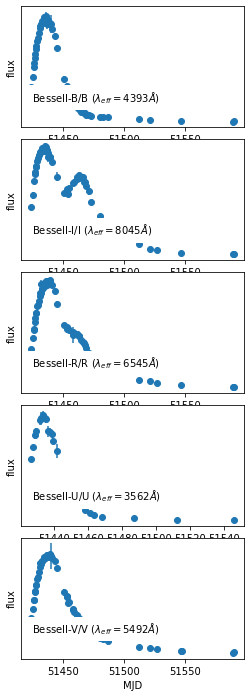

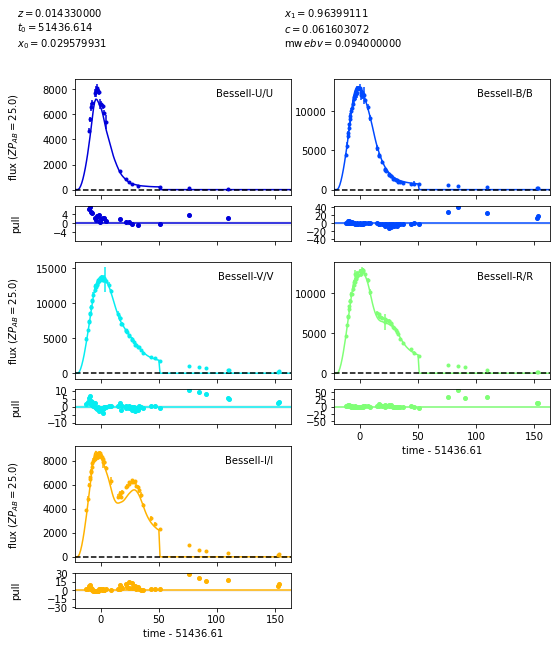

1999ef
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


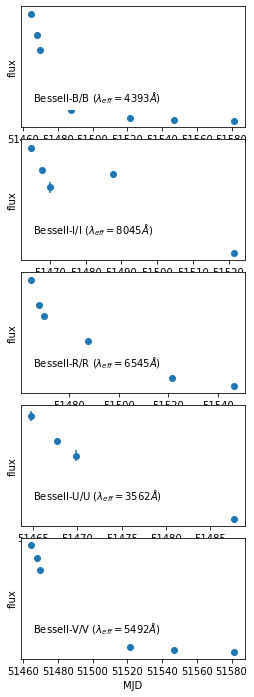

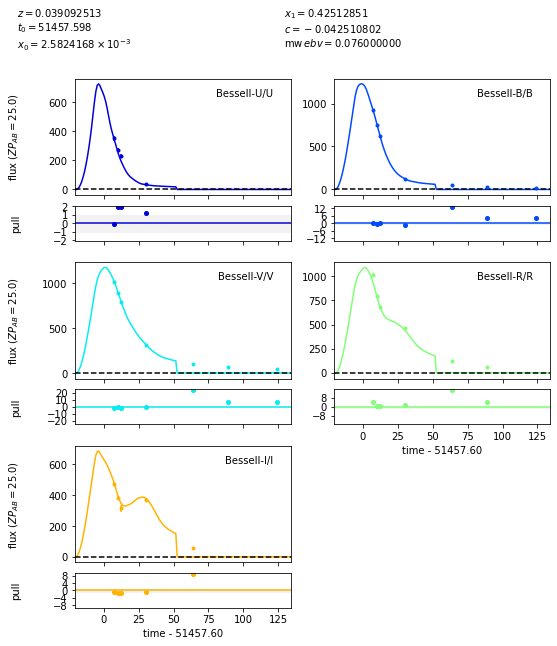

1999ej
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


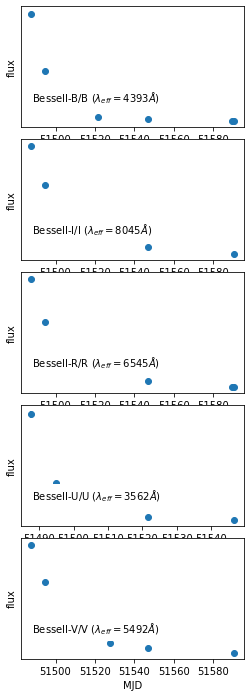

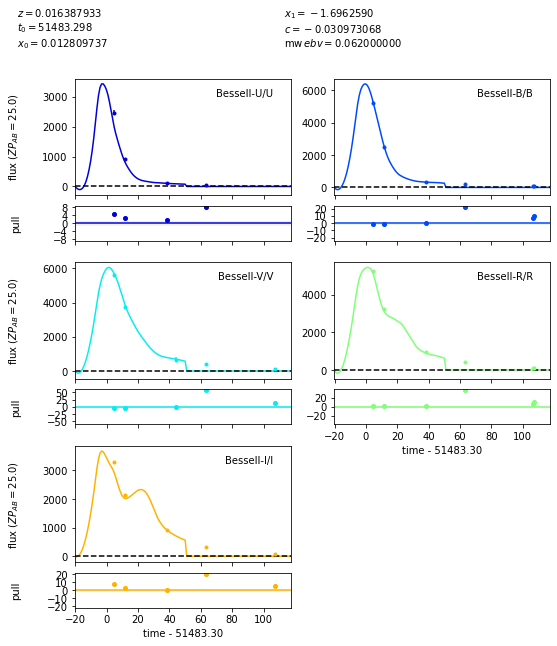

1999gh
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


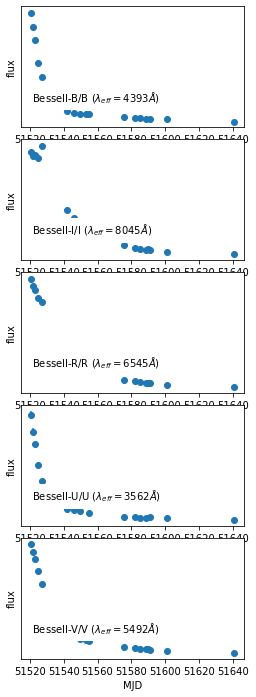

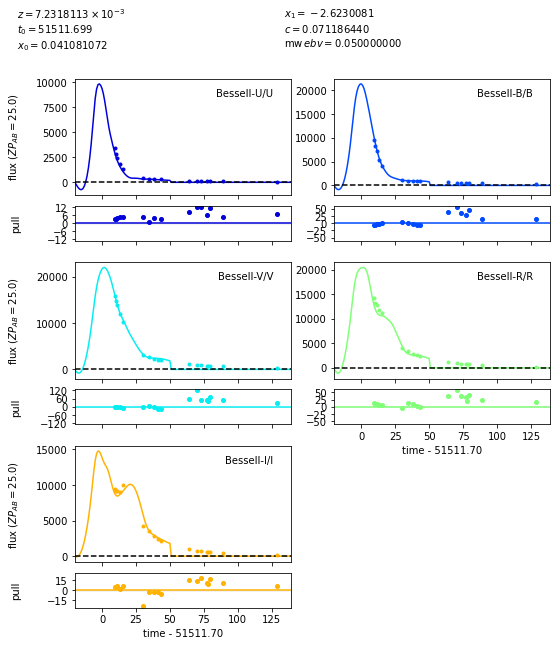

1999gp
CFA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


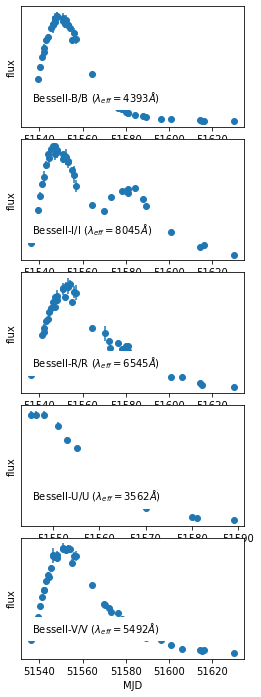

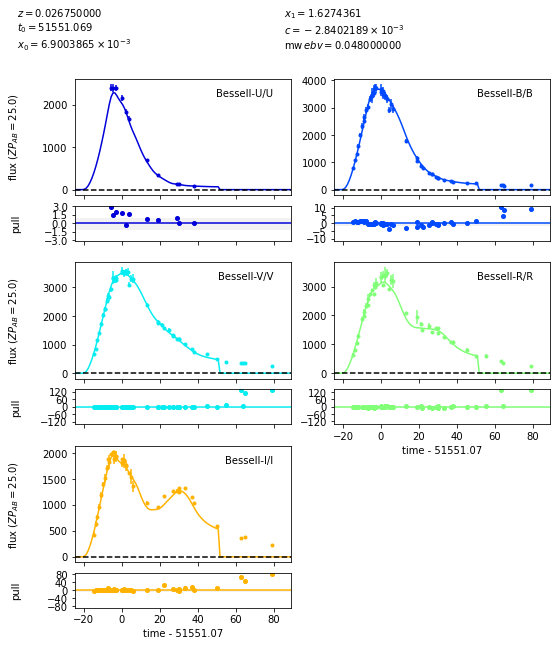

1999X
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


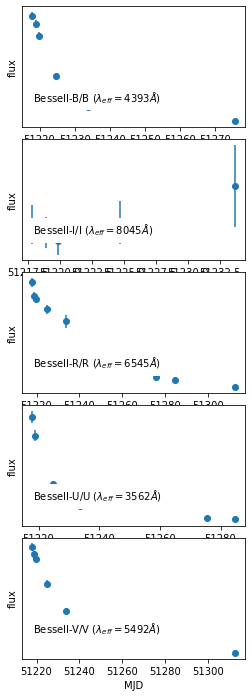

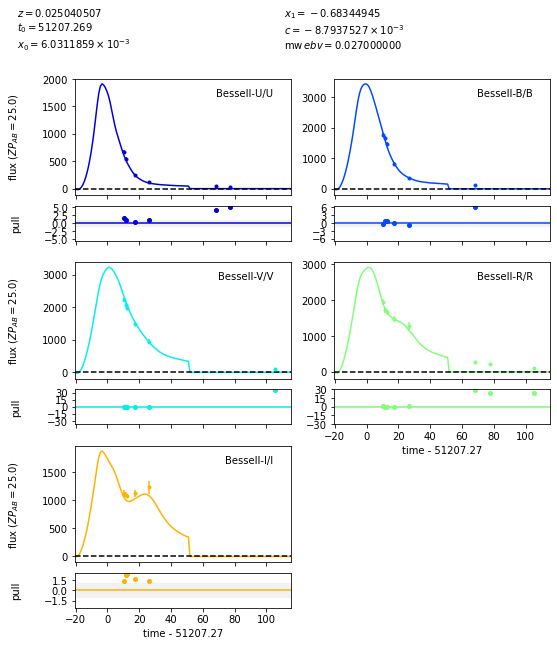

2000B
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


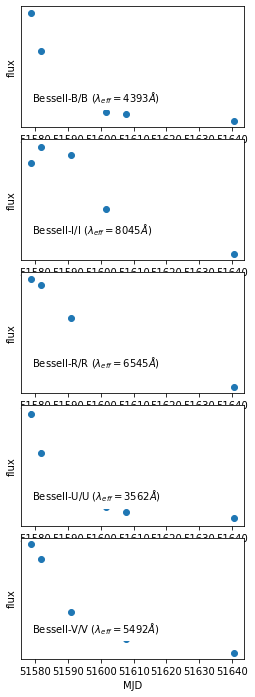

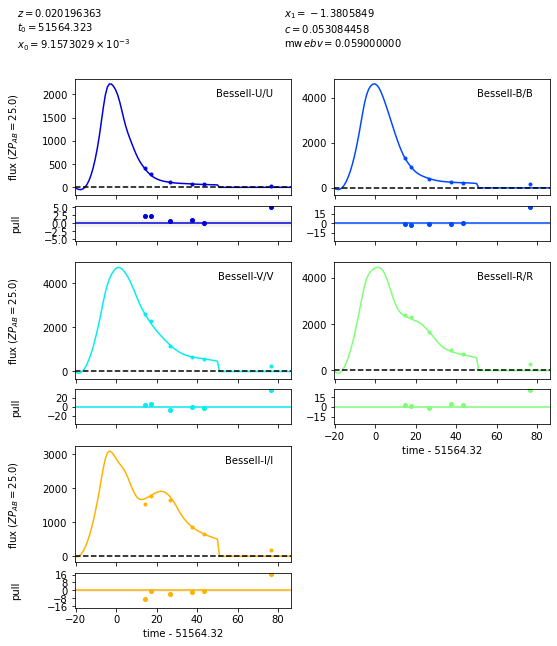

2000cf
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


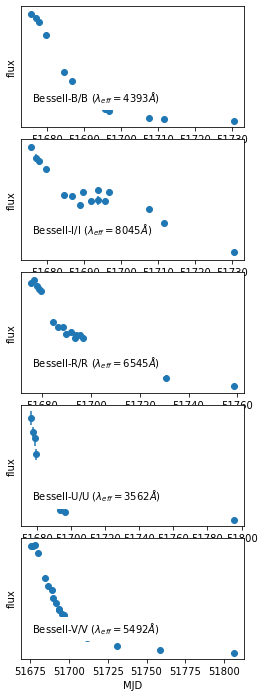

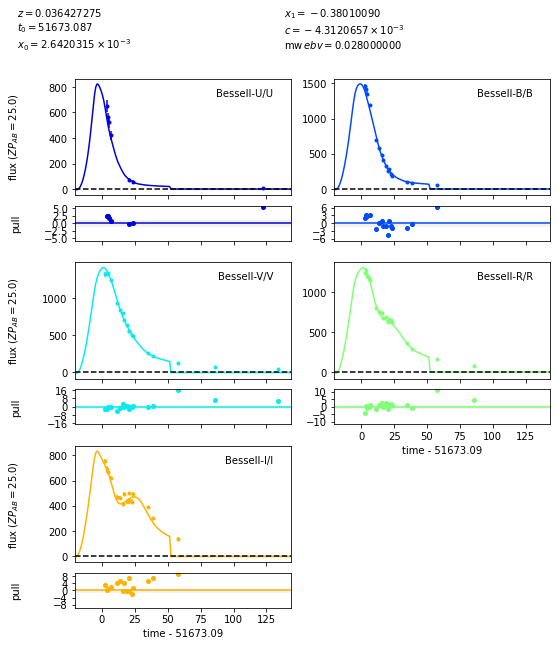

2000cn
CFA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


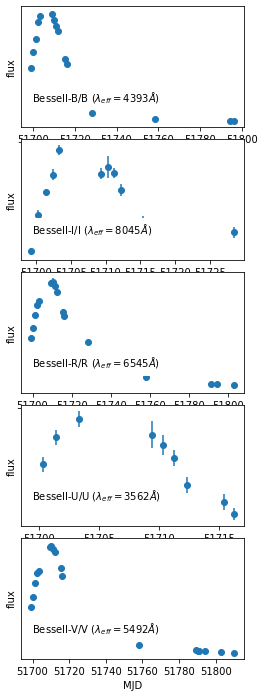

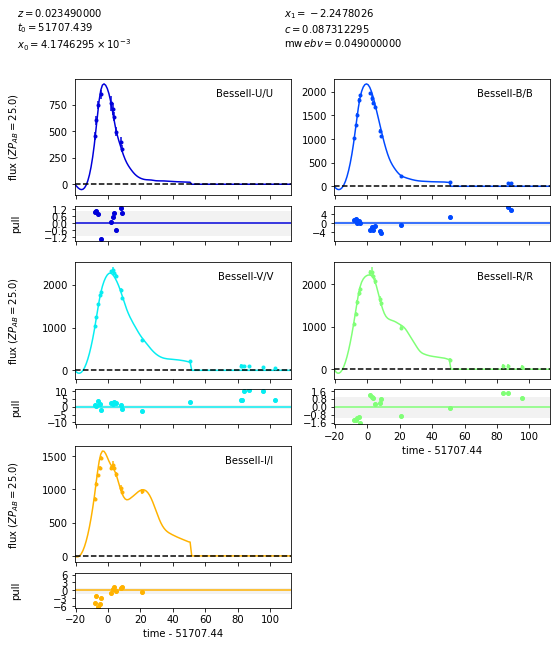

2000dk
CFA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


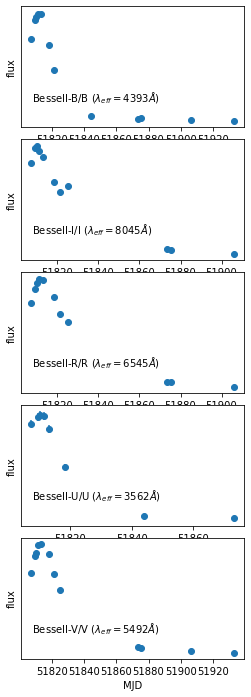

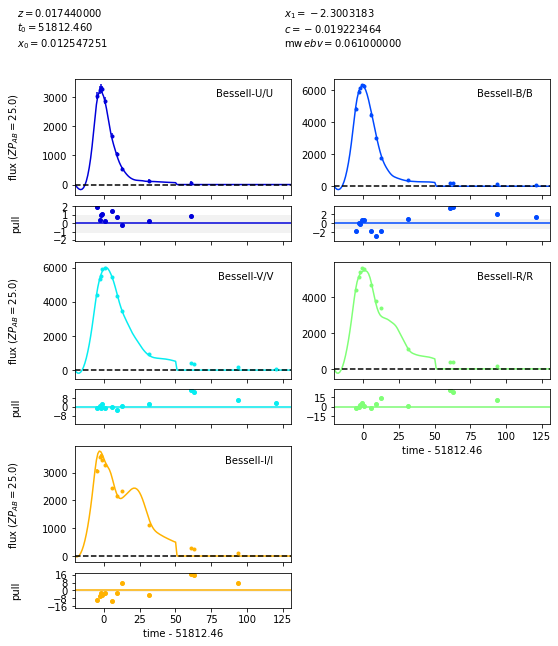

2000fa
CfA2 ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
Bessell-B/B
Bessell-I/I
Bessell-R/R
Bessell-U/U
Bessell-V/V


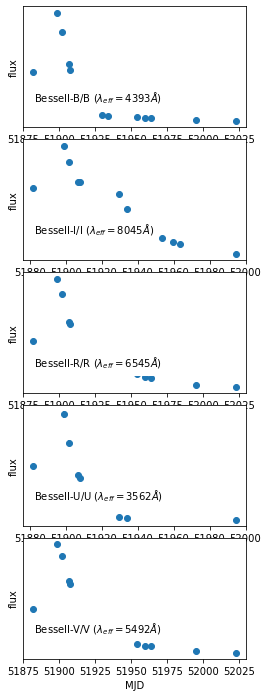

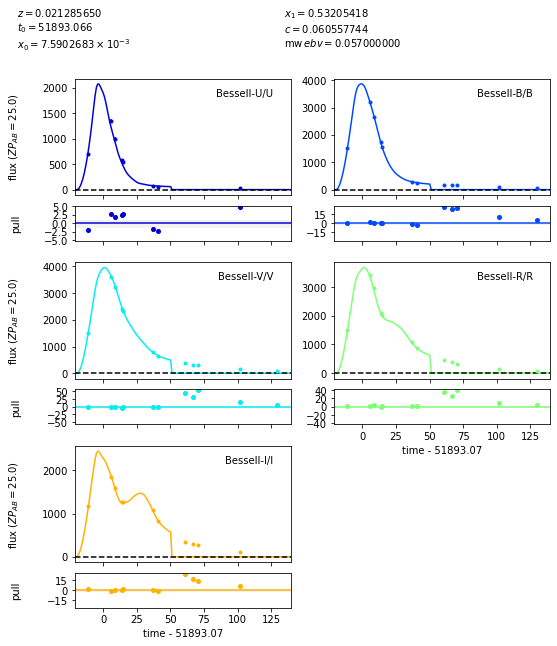

2001ah
CfA3S ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CFA3S-U/a', 'CFA3S-B/b', 'CFA3S-V/c', 'CFA3S-R/d', 'CFA3S-I/e', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
CFA3S-B/b
CFA3S-I/e
CFA3S-R/d
CFA3S-V/c


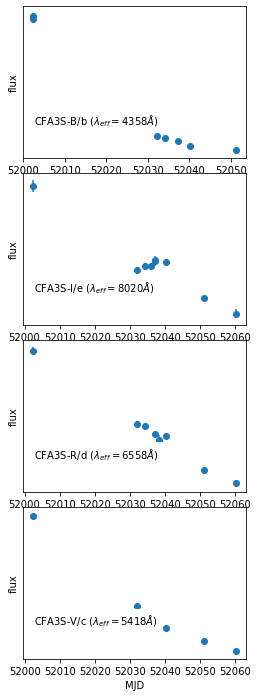

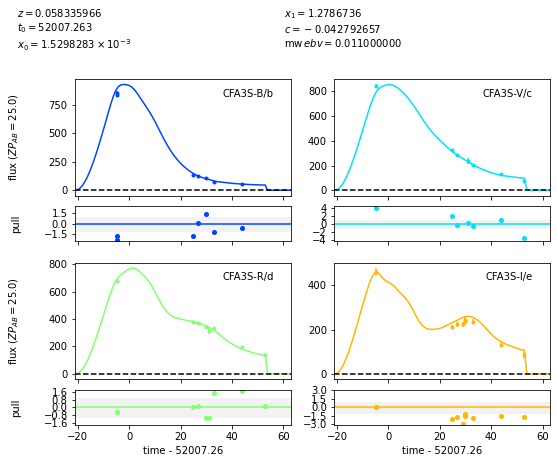

2001az
CfA3S ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CFA3S-U/a', 'CFA3S-B/b', 'CFA3S-V/c', 'CFA3S-R/d', 'CFA3S-I/e', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
CFA3S-B/b
CFA3S-I/e
CFA3S-R/d
CFA3S-U/a
CFA3S-V/c


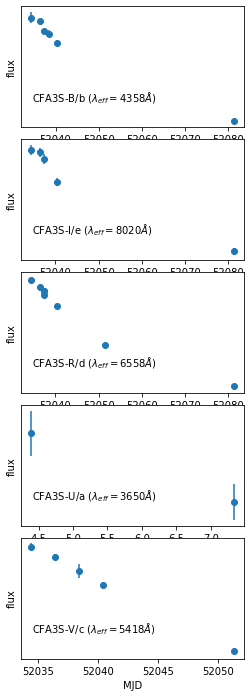

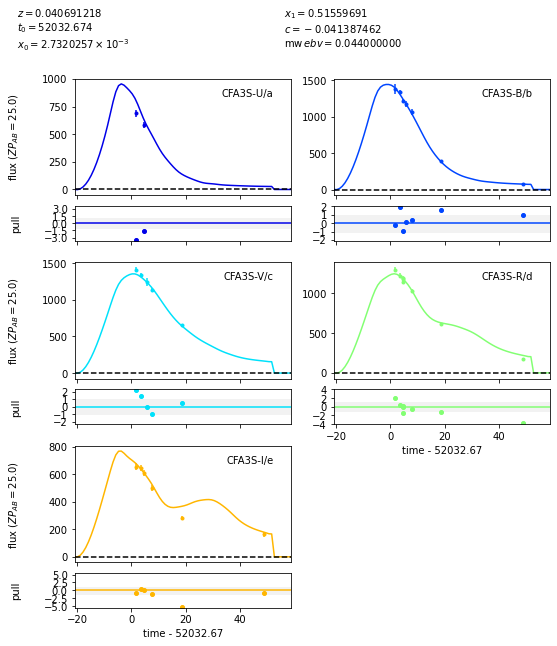

2001bf
CfA3S ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CFA3S-U/a', 'CFA3S-B/b', 'CFA3S-V/c', 'CFA3S-R/d', 'CFA3S-I/e', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
CFA3S-B/b
CFA3S-I/e
CFA3S-R/d
CFA3S-U/a
CFA3S-V/c


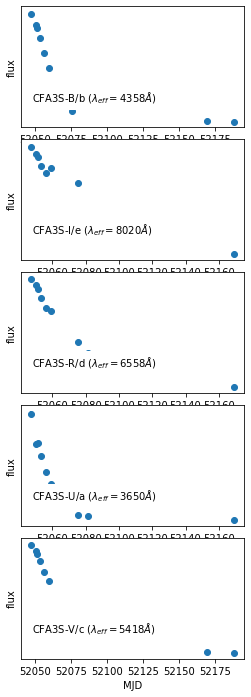

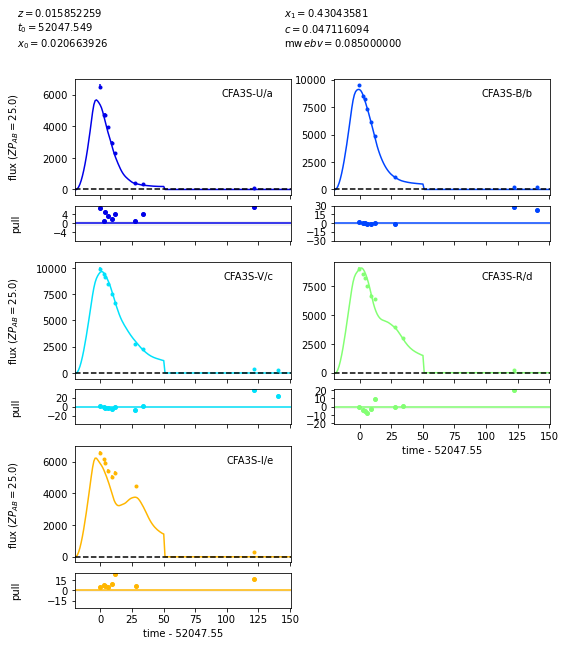

2001da
CfA3S ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CFA3S-U/a', 'CFA3S-B/b', 'CFA3S-V/c', 'CFA3S-R/d', 'CFA3S-I/e', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
CFA3S-B/b
CFA3S-I/e
CFA3S-R/d
CFA3S-U/a
CFA3S-V/c


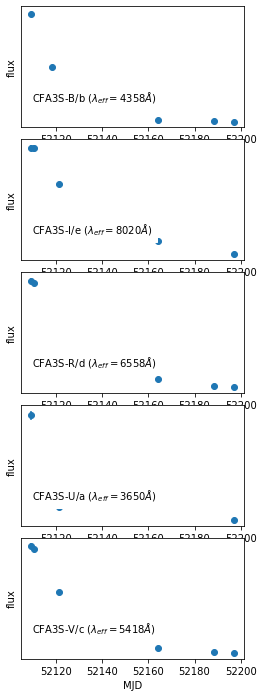

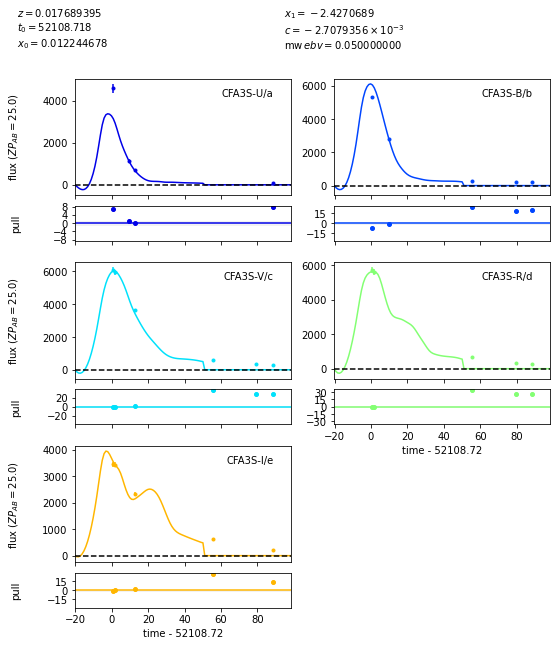

2001eh
CfA3S ['wavelength (A)', 'Bessell-U/U', 'Bessell-B/B', 'Bessell-V/V', 'Bessell-R/R', 'Bessell-I/I', 'CFA3K-U/f', 'CFA3K-B/h', 'CFA3K-V/j', 'CFA3K-r/k', 'CFA3K-i/l', 'CFA3S-U/a', 'CFA3S-B/b', 'CFA3S-V/c', 'CFA3S-R/d', 'CFA3S-I/e', 'CSP-u/t', 'CSP-B/u', 'CSP-o/v', 'CSP-m/w', 'CSP-n/x', 'CSP-g/y', 'CSP-r/z', 'CSP-i/A']
CFA3S-B/b
CFA3S-I/e
CFA3S-R/d
CFA3S-U/a
CFA3S-V/c


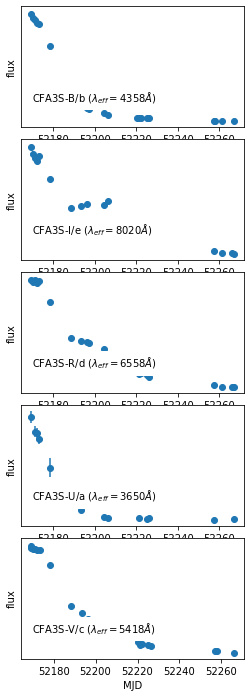

RuntimeError: result is NaN for [ 0.0362892 52253.2 18.2976 13.5798 971.436 0.055 ]

In [5]:
def procedure(sn):
    kcordict = {'CFA3':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Hicken2009.fits'),
                'CSP':os.path.expandvars('$SNDATA_ROOT/kcor/CSP/CSPDR3/kcor_CSPDR3_BD17.fits.gz'),
                'CSP_2':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_CSP.fits'),
                'CFA4p1':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_CFA4p1.fits'),
                'LOWZ':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_OTHER_LOWZ.fits'),
                'SDSS':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_SDSS.fits'),
                'CFA3S':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Hicken2009.fits'),
                'CfA3S':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Hicken2009.fits'),
                'CFA3K':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Hicken2009.fits'),
                'CfA3K':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Hicken2009.fits'),
                'CfA4p2':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_CfA4p2.fits'),
                'CfA1':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Riess1999.fits'),
                'CFA1':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Riess1999.fits'),
                'CFA2':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Jha2006.fits'),
                'CfA2':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Jha2006.fits'),
                'PS1MD':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_PS1MD.fits'),
                'FOUNDATION_DR1':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Foundation_DR1.fits'),
                'FOUNDATION':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Foundation_DR1.fits'),
                'CSPDR2':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_CSPDR2.fits')}
    SURVEY_KEY = sn.SURVEY.split('(')[0]
    if SURVEY_KEY not in kcordict:
        print(f'COULD NOT FIND {sn.SURVEY} IN kcordict USING KEY {SURVEY_KEY}')
        return
    kcorfile = kcordict[SURVEY_KEY]
    kcor = fits.open(kcorfile)
    #for i,k in enumerate(kcor):
        #if i==0:
            #continue
        #print(k.data.names)
    print(sn.SURVEY,kcor[5].data.names)
        # cosmetic things
    plt.rcParams['figure.figsize'] = (4,12)
    plt.subplots_adjust(hspace=0.1)

    # plot the SN "light curve" for each band
    for i,filt in enumerate(np.unique(sn.FLT)):
        # subplot for each filter
        ax = plt.subplot(len(np.unique(sn.FLT)),1,i+1)

        # fluxes and errors
        print(filt)
        ax.errorbar(sn.MJD[sn.FLT == filt],sn.FLUXCAL[sn.FLT == filt],yerr=sn.FLUXCALERR[sn.FLT == filt],fmt='o')

        # compute the effective wavelength so we know the "color" of each filter
        if filt not in kcor[5].data.names and len(filt) == 1:
            for name in kcor[5].data.names:
                if name[-1] == filt:
                    kcorfilt = name
        else:
            kcorfilt = filt
            
        lameff = np.sum(kcor[5].data[kcorfilt]*kcor[5].data['wavelength (A)'])/kcor[5].data[kcorfilt].sum()
        # using ax.text instead of title makes the spacing better
        ax.text(0.05,0.25,f"{filt} ($\lambda_{{eff}} = {lameff:.0f} \AA$)",ha='left',va='center',transform=ax.transAxes,bbox={'facecolor':'1.0','edgecolor':'1.0'})

        # cosmetic stuff
        ax.set_xlabel('MJD')
        ax.set_ylabel('flux')
        ax.set_yticks([]) # absolute flux doesn't matter for now
    plt.show()
    flc=LC_CLASS.LC()
    res = LC_CLASS.salt3_lc_fit(flc, sn.datfile, kcordict[SURVEY_KEY])
    return res
reses = []
for sn in sns:
    print(sn.SNID)
    reses.append(procedure(sn))
    